 # <font color=#025259>**Squad Sarah Gilbert**</font>

#### **Integrantes:**
- Anna Beatriz M. Vercesi
- Fernanda Pilat
- Izabelle Nunes
- Karina Cunha
- Joannyta Reis
- Luene Pizzi
- Thaís Faustino
- Priscila Mendes

---

#### **Divisão de atividades:**
- Anna Beatriz M. Vercesi: Análise de dados, análise de correlação policórica (realizada no R) e apresentação;
- Fernanda Pilat: Revisão de código, data viz e proposta de solução;
- Izabelle Nunes: Pesquisa, tratamento de dados, revisão de código e apresentação;
- Karina Cunha: Engenharia de variáveis, tratamento, análise e modelagem de dados, e data viz;
- Joannyta Reis: Pesquisa, análise de dados e apresentação;
- Luene Pizzi: Pesquisa, análise de dados e proposta de solução;
- Thaís Faustino: Pesquisa, análise de dados e data viz;
- Priscila Mendes: Engenharia de variáveis, tratamento, análise e modelagem de dados.

# <font color=#007172>**Previsão de Bullying**</font>

# <font color=#025259>**Sobre o conjunto de dados**</font>

O Global School-Based Student Health Survey (GSHS) é uma pesquisa escolar que usa um
questionário autoaplicável para obter dados sobre o comportamento de saúde dos jovens e
fatores de proteção relacionados às principais causas de morbidade e mortalidade.
A pesquisa foi realizada na Argentina em 2018. Um total de 56.981 alunos participaram.
A taxa de resposta da escola foi de 86%, a taxa de resposta do aluno foi de 74% e a taxa de
resposta geral foi de 63%.

**Sobre o desenvolvimento de um modelo de previsão de bullying**

A partir do GHSH, foram selecionadas as perguntas da pesquisa relacionadas ao bullying. Isto
com o objetivo de desenvolver um modelo que permita preveni-la.
Alguns dos indicadores de bullying têm sido relacionados a sentimentos de solidão, falta de
amigos íntimos, má comunicação com os pais, ausência nas aulas. (por exemplo, Nansel et al.
Comportamentos de bullying entre jovens americanos: Prevalência e associação com
ajustamento psicossocial)
Da mesma forma, jovens identificados por agressores como abaixo do peso, acima do peso e
obesos foram vítimas de bullying.

Os dados que deverão ser utilizado nesse script foram baixados do **kaggle**, e podem ser acessados através do [link](https://www.kaggle.com/datasets/leomartinelli/bullying-in-schools).


**Variáveis:**

● record: código identificador

● Bullied_on_school_property_in_past_12_months: Sofreu bullying na propriedade
da escola nos últimos 12 meses

● Bullied_not_on_school_property_in_past_12_months: sofreu bullying fora da
propriedade da escola nos últimos 12_meses

● Cyber_bullied_in_past_12_months: Cyberbullying nos últimos 12 meses

● Custom_Age: Idade

● Sex: Sexo

● Physically_attacked: Ataque físico

● Physical_fighting: Briga Física

● Felt_lonely: Sentiu-se sozinho

● Close_friends: Amigos próximos

● Miss_school_no_permission: Faltam à escola sem permissão

● Other_students_kind_and_helpful: Outros alunos gentis e prestativos

● Parents_understand_problems: Os pais entendem os problemas

● Most_of_the_time_or_always_felt_lonely: Na maioria das vezes ou sempre se
sentiu sozinho

● Missed_classes_or_school_without_permission: Perdeu aulas ou escola sem
permissão

● Were_underweight: Estava abaixo do peso

● Were_overweight: Estava acima do peso

● Were_obese: Estava obeso

> Os dados são arquivos em .csv.



# <font color=#025259> **Visão geral da análise** </font>

<font color=#025259>**I.</font> Análise de dados**

<font color=#025259>**1**.</font> Analise todas as variáveis. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

<font color=#025259>**2**.</font> Faça um comparativo dos bullyings sofridos por gênero, plote os resultados (histograma e boxplot).

<font color=#025259>**3.**</font> Qual a média de idade das pessoas que sofreram bullying, análise outras variáveis não relevantes como (felt_lonely, close_friends e outras) podem ter influenciado ataques de bullying? O que pode ser representado como principal motivo de bullying?

<font color=#025259> **II.</font> Modelagem de dados**

<font color=#025259>**4.**</font> Construa um modelo de regressão linear que explique o bullying virtual e offline.

<font color=#025259>**5.**</font> A partir do modelo, suponha que você esteja prestando assessoria a Secretaria da Educação e você tem como missão prever a proporção de ataques de bullying,analisando tanto os ataques físicos e ciberataques, diante do resultado. Proponha uma solução a Secretaria da Educação para que possa diminuir o bullying.

---

# <font color=#025259>**Exploração e limpeza dos dados** </font>

Antes de começarmos a análise, é necessário importar os pacotes que serão utilizados, bem como a base de dados. 
Para isso, iremos realizar a importação dos pacotes necessários e da base de dados que será utilizada durante a análise.

In [ ]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Importar dataframe

dados = pd.read_csv('Bullying_2018.csv', delimiter=';', index_col = 'record')

In [ ]:
# Visualizar variáveis

dados.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
record,,,,,,,,,,,,,,,,,
1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


## <font color=#007172>**Tipos das variáveis presentes na base de dados** </font>

In [ ]:
# Checar se existem dados duplicados

print(dados.index.duplicated().sum())

0


Não há dados duplicados no dataframe.

In [ ]:
# Imprimir as infos do dataframe

dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56981 entries, 1 to 57095
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 1   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 2   Cyber_bullied_in_past_12_months                   56981 non-null  object
 3   Custom_Age                                        56981 non-null  object
 4   Sex                                               56981 non-null  object
 5   Physically_attacked                               56981 non-null  object
 6   Physical_fighting                                 56981 non-null  object
 7   Felt_lonely                                       56981 non-null  object
 8   Close_friends                                     56981 non-null  object
 9   Miss_school_no_permission   


Nosso dataset consiste apenas em variáveis categóricas. Vamos agora identificar os tipos de variáveis categóricas presentes nos dados.

In [ ]:
# Verificar variáveis categóricas nominais e ordinais

for coluna in dados.columns:
  print(coluna)
  print(dados[coluna].unique())

Bullied_on_school_property_in_past_12_months
['Yes' 'No' ' ']
Bullied_not_on_school_property_in_past_12_months
['Yes' 'No' ' ']
Cyber_bullied_in_past_12_months
[' ' 'No' 'Yes']
Custom_Age
['13 years old' '14 years old' '16 years old' '12 years old'
 '15 years old' '11 years old or younger' '17 years old' ' '
 '18 years old or older']
Sex
['Female' 'Male' ' ']
Physically_attacked
['0 times' '1 time' '12 or more times' '4 or 5 times' '2 or 3 times'
 '10 or 11 times' '8 or 9 times' '6 or 7 times' ' ']
Physical_fighting
['0 times' '2 or 3 times' '1 time' '4 or 5 times' '6 or 7 times'
 '8 or 9 times' '10 or 11 times' ' ' '12 or more times']
Felt_lonely
['Always' 'Never' 'Rarely' 'Sometimes' 'Most of the time' ' ']
Close_friends
['2' '3 or more' '0' ' ' '1']
Miss_school_no_permission
['10 or more days' '0 days' '6 to 9 days' '3 to 5 days' ' ' '1 or 2 days']
Other_students_kind_and_helpful
['Never' 'Sometimes' 'Most of the time' ' ' 'Always' 'Rarely']
Parents_understand_problems
['Always' ' '

| Categóricas nominais | Categóricas ordinais|
| ------ | ----------- |
| Bullied_on_school_property_in_past_12_months   | Custom_Age
| Bullied_not_on_school_property_in_past_12_months| Physically_attacked
| Cyber_bullied_in_past_12_months| Physical_fighting
| Sex| Felt_lonely
| Most_of_the_time_or_always_felt_lonely| Close_friends
| Missed_classes_or_school_without_permission| Miss_school_no_permission
| Were_underweight| Other_students_kind_and_helpful
| Were_overweight| Parents_understand_problems
| Were_obese|

## <font color=#007172>**Verificação de missing values (campos em branco)** </font>

Substituímos os espaços em branco do conjunto de dados por **Not a number** (NaN).

In [ ]:
# Verificando se há algum espaço nas células vazias

dados.iloc[1,15]

' '

In [ ]:
# Substituindo os espaços em branco

dados = dados.replace(' ', np.nan)
dados.sample(5)

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
record,,,,,,,,,,,,,,,,,
5540,No,No,No,16 years old,Male,0 times,0 times,Never,3 or more,0 days,Most of the time,Always,No,No,NaN,NaN,NaN
54732,No,No,No,14 years old,Male,0 times,0 times,Never,1,0 days,Never,Never,No,No,NaN,NaN,NaN
14711,No,No,No,16 years old,Male,0 times,0 times,Never,3 or more,0 days,Always,Most of the time,No,No,Yes,No,No
47450,No,Yes,Yes,15 years old,Female,0 times,0 times,Sometimes,3 or more,0 days,Rarely,Rarely,No,No,No,No,No
52735,Yes,Yes,No,15 years old,Male,0 times,1 time,Rarely,3 or more,0 days,Never,Most of the time,No,No,NaN,NaN,NaN


In [ ]:
# Verificando como estão distribuídos os missing values pelas colunas

dados.count().sort_values()

Were_obese                                          36052
Were_underweight                                    36052
Were_overweight                                     36052
Parents_understand_problems                         54608
Missed_classes_or_school_without_permission         55117
Miss_school_no_permission                           55117
Other_students_kind_and_helpful                     55422
Bullied_on_school_property_in_past_12_months        55742
Close_friends                                       55905
Cyber_bullied_in_past_12_months                     56410
Sex                                                 56445
Bullied_not_on_school_property_in_past_12_months    56492
Most_of_the_time_or_always_felt_lonely              56615
Felt_lonely                                         56615
Physical_fighting                                   56713
Physically_attacked                                 56741
Custom_Age                                          56873
dtype: int64


Notamos que as seguintes variáveis têm um número semelhante de valores faltantes: 
- Were_obese, Were_underweight e Were_overweight; 
- Missed_classes_or_school_without_permission e Miss_school_no_permission; 
- Most_of_the_time_or_always_felt_lonely e Felt_lonely. 

Como essas variáveis podem estar **relacionadas à saúde e ao bem-estar** dos alunos, decidimos investigá-las com mais detalhes:

In [ ]:
# Quantidade de ocorrências entre felt_lonely e most_of_the_time_or_always_felt_lonely

dados[['Felt_lonely','Most_of_the_time_or_always_felt_lonely']].value_counts()

Felt_lonely       Most_of_the_time_or_always_felt_lonely
Never             No                                        17931
Sometimes         No                                        14714
Rarely            No                                        14427
Most of the time  Yes                                        6422
Always            Yes                                        3121
dtype: int64

In [ ]:
# Quantidade de ocorrências entre missed_classes_or_school_without_permission e miss_school_no_permission

dados[['Missed_classes_or_school_without_permission','Miss_school_no_permission']].value_counts()

Missed_classes_or_school_without_permission  Miss_school_no_permission
No                                           0 days                       38654
Yes                                          1 or 2 days                   9739
                                             3 to 5 days                   3925
                                             10 or more days               1468
                                             6 to 9 days                   1331
dtype: int64

In [ ]:
# Quantidade de ocorrências entre: were_obese, were_underweight e were_overweight

dados[['Were_obese','Were_underweight','Were_overweight']].value_counts()

Were_obese  Were_underweight  Were_overweight
No          No                No                 24644
                              Yes                 8020
Yes         No                Yes                 2655
No          Yes               No                   733
dtype: int64

Decidimos combinar as informações das variáveis `'Were_obese'` e `'Were_overweight'` em uma única coluna, uma vez que constatamos que todos os participantes que responderam **'sim'** para a pergunta `'Were_obese'` também responderam **'sim'** para `'Were_overweight'`.

Para analisar mais detalhadamente esse grupo, realizamos uma consulta para examinar esses dados.

In [ ]:
dados.query('Were_obese == "Yes" and Were_underweight == "No" and Were_overweight == "No"')

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
record,,,,,,,,,,,,,,,,,


Embora não tenha havido retorno de dados adicionais, ao revisarmos a metodologia da pesquisa, constatamos que as informações sobre o peso dos alunos foram coletadas e inseridas por uma pessoa responsável por calcular o índice de massa corporal (IMC).

Caso o estudante não informasse seu peso ou altura, escolhesse mais de um número em qualquer uma das colunas ou respondesse "Não sei", então as variáveis Were_obese, Were_underweight e Were_overweight não seriam preenchidas.

Nesse contexto, verificamos que as variáveis Missed_classes_or_school_without_permission e Miss_school_no_permission, bem como Most_of_the_time_or_always_felt_lonely e Felt_lonely, são derivadas uma da outra.

Com base nessas informações, podemos concluir que os valores que parecem ser aleatórios não são realmente aleatórios e podem ser eliminados do conjunto de dados, dependendo da análise em questão.

# <font color=#025259>**Frequências presentes na base de dados** </font>

## <font color=#007172> **Frequências das variáveis nominais**

1. **Bullied_on_school_property_in_past_12_months**: Sofreu bullying na escola nos últimos 12 meses
2. **Bullied_not_on_school_property_in_past_12_months**: Sofreu bullying fora da escola nos últimos 12 meses
3. **Cyber_bullied_in_past_12_months**: Sofreu bullying virtual nos últimos 12 meses
4. **Sex**: Gênero
5. **Most_of_the_time_or_always_felt_lonely**: Sentiu-se sozinho na maioria das vezes ou sempre
6. **Missed_classes_or_school_without_permission**: Faltou na escola sem permissão
7. **Were_underweight**: Esteve abaixo do peso
8. **Were_overweight**: Esteve acima do peso
9. **Were_obese**: Esteve obeso

In [ ]:
# Frequencia de 'Sofreu bullying na escola nos últimos 12 meses'

frequencia = dados['Bullied_on_school_property_in_past_12_months'].value_counts(ascending = True)
porcentagem = dados['Bullied_on_school_property_in_past_12_months'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de Bullying na escola': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,Frequência de Bullying na escola,Porcentagem (%)
No,43839,79.0
Yes,11903,21.0


In [ ]:
# Frequencia de 'Sofreu bullying fora da escola nos últimos 12 meses'

frequencia = dados['Bullied_not_on_school_property_in_past_12_months'].value_counts(ascending = True)
porcentagem = dados['Bullied_not_on_school_property_in_past_12_months'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de Bullying fora escola': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,Frequência de Bullying fora escola,Porcentagem (%)
No,44263,78.0
Yes,12229,22.0


In [ ]:
# Frequencia de 'Sofreu bullying virtual nos últimos 12 meses'

frequencia = dados['Cyber_bullied_in_past_12_months'].value_counts(ascending = True)
porcentagem = dados['Cyber_bullied_in_past_12_months'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de CyberBullying nos últimos 12 meses': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,Frequência de CyberBullying nos últimos 12 meses,Porcentagem (%)
No,44213,78.0
Yes,12197,22.0


In [ ]:
# Frequencia 'Gênero'

frequencia= dados['Sex'].value_counts(ascending = True)
porcentagem = dados['Sex'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de gênero': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,Frequência de gênero,Porcentagem (%)
Female,29362,52.0
Male,27083,48.0


In [ ]:
# Frequencia de 'Sentiu-se sozinho na maioria das vezes ou sempre'

frequencia = dados['Most_of_the_time_or_always_felt_lonely'].value_counts(ascending = True)
porcentagem = dados['Most_of_the_time_or_always_felt_lonely'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de "Se sentiu sozinho na maioria das vezes ou sempre"': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,"Frequência de ""Se sentiu sozinho na maioria das vezes ou sempre""",Porcentagem (%)
No,47072,83.0
Yes,9543,17.0


In [ ]:
# Frequencia de 'Faltou na escola sem permissão'

frequencia = dados['Missed_classes_or_school_without_permission'].value_counts(ascending = True)
porcentagem = dados['Missed_classes_or_school_without_permission'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de "Faltou aulas sem permissão"': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,"Frequência de ""Faltou aulas sem permissão""",Porcentagem (%)
No,38654,70.0
Yes,16463,30.0


In [ ]:
# Frequencia de 'Esteve abaixo do peso'
frequencia = dados['Were_underweight'].value_counts(ascending = True)
porcentagem = dados['Were_underweight'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de alunos abaixo do peso': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,Frequência de alunos abaixo do peso,Porcentagem (%)
No,35319,98.0
Yes,733,2.0


In [ ]:
# Frequencia de 'Esteve acima do peso'
frequencia = dados['Were_overweight'].value_counts(ascending = True)
porcentagem = dados['Were_overweight'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de alunos com sobrepeso': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,Frequência de alunos com sobrepeso,Porcentagem (%)
No,25377,70.0
Yes,10675,30.0


In [ ]:
# Frequencia 'Esteve obeso'
frequencia = dados['Were_obese'].value_counts(ascending = True)
porcentagem = dados['Were_obese'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência de alunos com obesidade': frequencia, 'Porcentagem (%)': round(porcentagem)
     }
     )

,Frequência de alunos com obesidade,Porcentagem (%)
No,33397,93.0
Yes,2655,7.0


## <font color=#007172> **Frequências das variáveis ordinais**

1. **Custom_Age:** Idade personalizada
2. **Physically_attacked:** Atacado fisicamente
3. **Physical_fighting:** Luta física
4. **Felt_lonely:** Sentiu-se solitário
5. **Close_friends:** Amigos próximos
6. **Miss_school_no_permission:** Faltou à escola sem permissão
7. **Other_students_kind_and_helpful:** Outros alunos gentis e prestativos
8. **Parents_understand_problems:** Pais compreenderam problemas

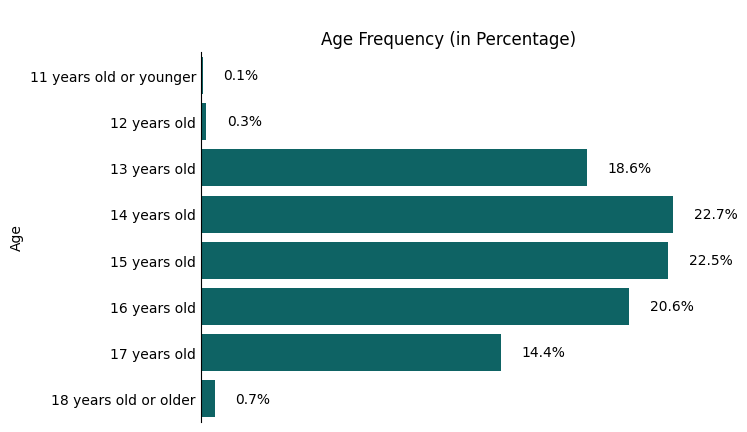

In [ ]:
# Gráfico com a frequência de idades

total_observations = dados['Custom_Age'].count()
percentage_frequency = (dados['Custom_Age'].value_counts() / total_observations) * 100

fig = sns.barplot(x=percentage_frequency, y=percentage_frequency.index, color='#007172',
                  order=[
                      '11 years old or younger', '12 years old', '13 years old', '14 years old', '15 years old',
                      '16 years old', '17 years old', '18 years old or older'
                  ]
                 )
fig.set_xlabel('')
fig.set_ylabel('Age')
fig.set_title('\nAge Frequency (in Percentage)', fontsize=12)
fig.set_facecolor('none')

for p in fig.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 1
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='left', va='center')

fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='both', which='both', length=0, labelbottom=False)
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('left')

A maioria dos respondentes tem entre 14 e 16 anos de idade, com 14 anos sendo a idade mais comum entre os participantes. Por outro lado, apenas um pequeno número de participantes tem menos de 11 anos ou mais de 18 anos, o que sugere que a pesquisa pode ter se concentrado principalmente em adolescentes.

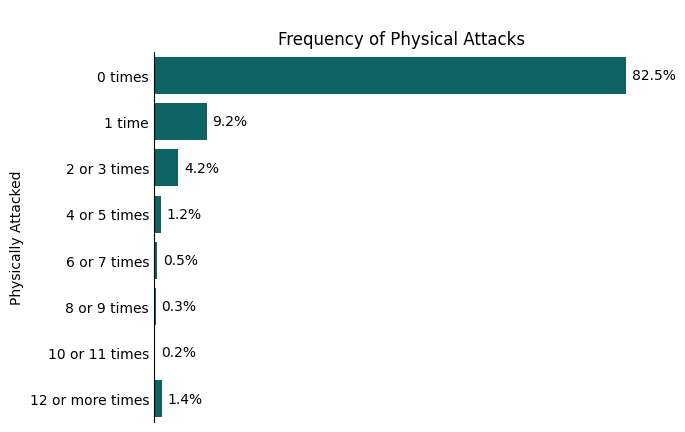

In [ ]:
# Gráfico com a frequência de agressão física

total_observations = dados['Physically_attacked'].count()
percentage_frequency = (dados['Physically_attacked'].value_counts() / total_observations) * 100

translated_labels = {
    '0 vezes': '0 times',
    '1 vez': '1 time',
    '2 ou 3 vezes': '2 or 3 times',
    '4 ou 5 vezes': '4 or 5 times',
    '6 ou 7 vezes': '6 or 7 times',
    '8 ou 9 vezes': '8 or 9 times',
    '10 ou 11 vezes': '10 or 11 times',
    '12 ou mais vezes': '12 or more times'
}

fig = sns.barplot(x=percentage_frequency, y=[translated_labels.get(label, label) for label in percentage_frequency.index], color='#007172',
                  order=[
                      '0 times', '1 time', '2 or 3 times', '4 or 5 times', '6 or 7 times',
                      '8 or 9 times', '10 or 11 times', '12 or more times'
                  ]
                 )
fig.set_xlabel('')
fig.set_ylabel('Physically Attacked')
fig.set_title('\nFrequency of Physical Attacks', fontsize=12)
fig.set_facecolor('none')

for p in fig.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 1
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='left', va='center')

fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='both', which='both', length=0, labelbottom=False)
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('left')

Com base nos dados apresentados, podemos observar que a maioria dos participantes - **82.5%** não sofreu nenhum ataque físico nos últimos 12 meses. Cerca de participantes relataram ter sofrido um ataque físico, enquanto **4.2%** relataram ter sofrido entre 2 e 3 ataques físicos no mesmo período. Já **1.4%** participantes relataram ter sofrido 12 ou mais ataques físicos.

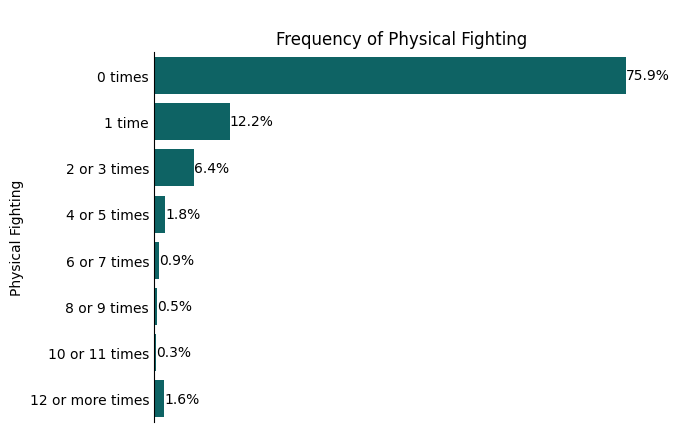

In [ ]:
# Gráfico com a frequência de luta física

fig = sns.countplot(data=dados, y='Physical_fighting', color='#007172',
                    order=[
                        '0 times', '1 time', '2 or 3 times', '4 or 5 times', '6 or 7 times',
                        '8 or 9 times', '10 or 11 times', '12 or more times'
                    ]
                    )
fig.set_xlabel('')
fig.set_ylabel('Physical Fighting')
fig.set_title('\nFrequency of Physical Fighting', fontsize=12)
fig.set_facecolor('none')

total = float(len(dados['Physical_fighting']))
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='left', va='center')

fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='both', which='both', length=0, labelbottom=False)
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('left')

Com base na distribuição dos dados para a variável "Physical_fighting", podemos observar que a maioria dos alunos - **75.9%** nunca se envolveu em lutas físicas. Entretanto, uma parcela significativa dos alunos - **12.2%** se envolveu em uma luta física pelo menos uma vez. Além disso, há uma tendência decrescente na frequência de alunos que se envolveram em lutas físicas à medida que o número de vezes aumenta. Poucos alunos - **0.3%** se envolveram em lutas físicas 10 ou 11 vezes, e uma quantidade ainda menor - **1.6%** se envolveu 8 ou 9 vezes.

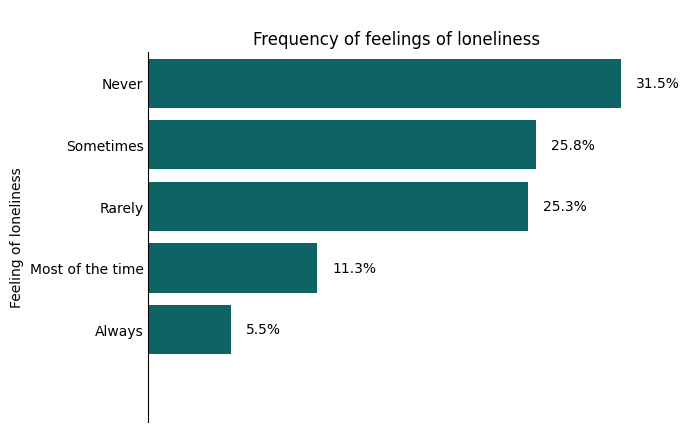

In [ ]:
# Gráfico com a frequência de sentimentos de solidão

order = dados['Felt_lonely'].value_counts().index

total_observations = dados['Felt_lonely'].count()
percentage_frequency = (dados['Felt_lonely'].value_counts() / total_observations) * 100

translated_labels = {
    'Sentimento de solidão': 'Feeling of loneliness',
}

fig = sns.barplot(x=percentage_frequency, y=percentage_frequency.index, color='#007172', order=order)
fig.set_ylabel('Feeling of loneliness')
fig.set_xlabel('')
fig.set_title('\nFrequency of feelings of loneliness', fontsize=12)
fig.set_facecolor('none')


for p in fig.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 1
    y = p.get_y() + p.get_height() / 2
    if percentage == '0.6%':
        fig.annotate('', (x, y), ha='left', va='center')
    else:
        fig.annotate(percentage, (x, y), ha='left', va='center')

fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='both', which='both', length=0, labelbottom=False)
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('left')

fig.patches[-1].set_visible(False)



A variável "Felt_lonely" apresenta uma distribuição com a maioria dos respondentes afirmando que nunca se sentiram sozinhos (**31.5%**). Porém, há uma proporção significativa de indivíduos que afirmaram sentir-se sozinhos às vezes (**25.8%**), raramente (**25.3%**), na maioria das vezes (**11.3%**) e sempre (**5.5%**). Esses resultados indicam que uma parcela considerável dos alunos já experimentou a sensação de solidão.

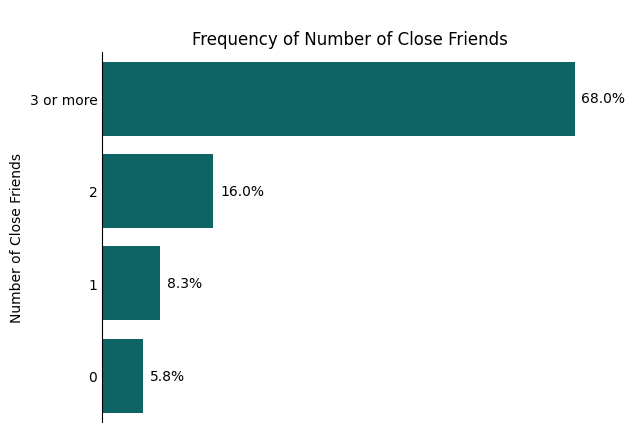

In [ ]:
# Gráfico com a frequência de número de amigos próximos

total_observations = dados['Close_friends'].count()
percentage_frequency = (dados['Close_friends'].value_counts() / total_observations) * 100

fig = sns.barplot(x=percentage_frequency, y=percentage_frequency.index, color='#007172',
                  order=['3 or more', '2', '1', '0'])

fig.set_ylabel('Number of Close Friends')
fig.set_xlabel('')
fig.set_title('\nFrequency of Number of Close Friends', fontsize=12)
fig.set_facecolor('none')

for p in fig.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 1
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='left', va='center')

fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='both', which='both', length=0, labelbottom=False)
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('left')

A variável "Close_friends" indica a quantidade de amigos próximos que o aluno tem. A distribuição dos dados indica que a maioria dos alunos - **68%**, afirmaram ter três ou mais amigos próximos. Cerca de **16%** dos alunos afirmaram ter dois amigos próximos, enquanto aproximadamente **8.3%** afirmaram ter apenas um amigo próximo e pouco mais de **5.8%** alunos afirmaram não ter amigos próximos.

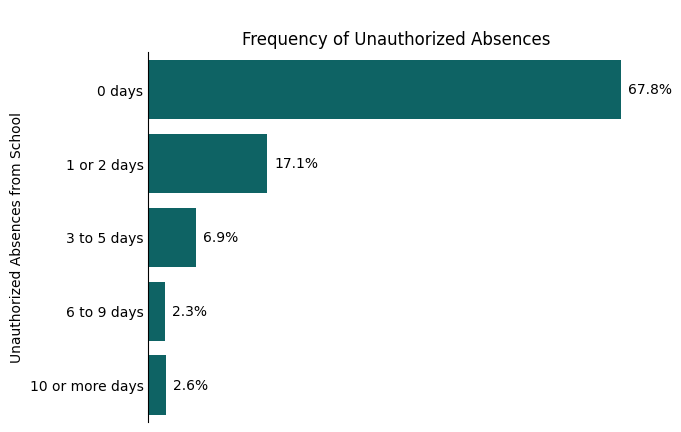

In [ ]:
# Gráfico com a frequência do número de faltas sem permissão

total_observations = dados['Miss_school_no_permission'].count()
percentage_frequency = (dados['Miss_school_no_permission'].value_counts() / total_observations) * 100

fig = sns.barplot(x=percentage_frequency, y=percentage_frequency.index, color='#007172',
                  order=[
                      '0 days', '1 or 2 days', '3 to 5 days', '6 to 9 days', '10 or more days'
                  ]
                 )
fig.set_ylabel('Unauthorized Absences from School')
fig.set_xlabel('')
fig.set_title('\nFrequency of Unauthorized Absences', fontsize=12)
fig.set_facecolor('none')


for p in fig.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_width() + 1
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='left', va='center')

fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='both', which='both', length=0, labelbottom=False)
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('left')

Observa-se que a maioria dos estudantes relataram não ter faltado às aulas sem permissão, com mais de **67.8%** dos estudantes relatando 0 dias de falta. No entanto, cerca de **17.1%** dos estudantes relataram ter faltado pelo menos um dia sem permissão.

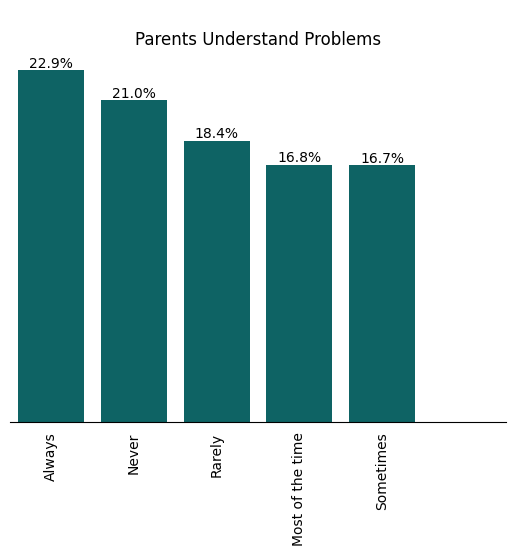

In [ ]:
# Gráfico com a frequência do número de pais entendem os problemas

parents_order = dados['Parents_understand_problems'].value_counts().index.tolist()

fig = sns.countplot(data=dados, x='Parents_understand_problems', color='#007172', order=parents_order, width=0.8)

fig.set_ylabel('')
fig.set_xlabel('')
fig.set_title('\nParents Understand Problems', fontsize=12)
fig.set_facecolor('none')

total = float(len(dados['Parents_understand_problems']))
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1
    if percentage == '4.2%':
        p.set_height(0)  
    else:
        fig.annotate(percentage, (x, y), ha='center', va='bottom')
    

fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.spines['bottom'].set_visible(True)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='y', labelleft=False)
fig.yaxis.set_ticks_position('none')
fig.xaxis.set_ticks_position('none')
fig.set_xticklabels(parents_order, rotation=90)

plt.show()

* Always (Sempre): 13072 alunos (**22.9%**)
* Never (Nunca): 11965 alunos (**21%**)
* Rarely (Raramente): 10459 alunos (**18.4%**)
* Most of the time (Na maioria das vezes): 9570 alunos (**16.8%**)
* Sometimes (Às vezes): 9542 alunos (**16.7%**)

Podemos observar que a maioria dos alunos (aproximadamente **39.7%**) sentem que seus pais os entendem "Sempre" ou "Na maioria das vezes". Já a minoria (aproximadamente **21%**) nunca sente que seus pais entendem seus problemas.

[Text(0, 0, 'Always'),
 Text(1, 0, 'Never'),
 Text(2, 0, 'Rarely'),
 Text(3, 0, 'Most of the time'),
 Text(4, 0, 'Sometimes'),
 Text(5, 0, ' ')]

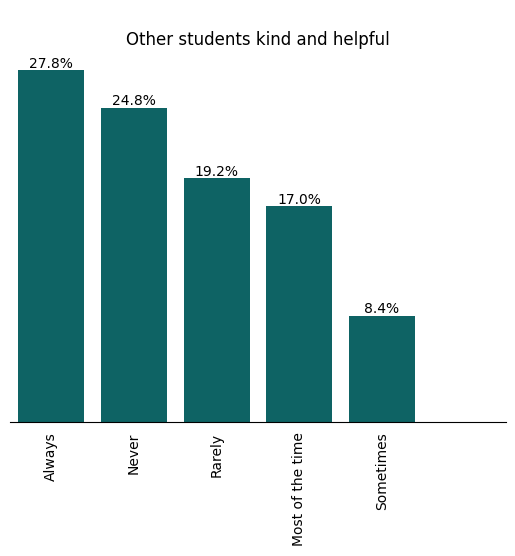

In [ ]:
# Gráfico com a frequência com que outros estudantes são gentis e solícitos

freq = dados['Other_students_kind_and_helpful'].value_counts(normalize=True)
order = freq.index.tolist()

fig = sns.countplot(data=dados, x='Other_students_kind_and_helpful', color='#007172', order=order)

fig.set_ylabel('')
fig.set_xlabel('')
fig.set_title('\nOther students kind and helpful', fontsize=12)
fig.set_facecolor('none')

total = float(len(dados['Other_students_kind_and_helpful']))
for p in fig.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1
    if percentage == '2.7%':
        p.set_height(0)  
    else:
        fig.annotate(percentage, (x, y), ha='center', va='bottom')

fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.spines['bottom'].set_visible(True)
fig.spines['top'].set_visible(False)
fig.tick_params(axis='y', labelleft=False)
fig.yaxis.set_ticks_position('none')
fig.xaxis.set_ticks_position('none')
fig.set_xticklabels(parents_order, rotation=90)

Essa variável indica com que frequência outros estudantes são gentis e prestativos. Podemos ver que a maioria dos estudantes respondeu que os outros estudantes são gentis e prestativos na maior parte do tempo (**17%** respostas). Em seguida, a frequência caiu para a resposta "Às vezes" (**8.4%** respostas), seguida por "Raramente" (**19.2%** respostas), "Sempre" (**27.8%** respostas) e "Nunca" (**24.8%** respostas). Isso sugere que, em geral, os estudantes têm uma percepção positiva sobre a gentileza e prestatividade dos seus colegas de escola, mas ainda há uma proporção significativa que não percebe tais comportamentos.

---

# <font color=#025259>**Análise de correlação** </font>

## <font color=#007172> **Escaling**

Para realizar a correlação com dados categóricos, é necessário transformá-los em dados numéricos, levando em conta a ordem dos dados categóricos ordinais.

In [ ]:
# Criando uma cópia dos dados

dados_copy = dados

In [ ]:
# Criando listas com as colunas de acordo com os tipos de respostas ao questionarios

yes_no = ['Bullied_on_school_property_in_past_12_months','Bullied_not_on_school_property_in_past_12_months','Cyber_bullied_in_past_12_months',
'Most_of_the_time_or_always_felt_lonely','Missed_classes_or_school_without_permission','Were_underweight','Were_overweight','Were_obese']

times = ['Physically_attacked', 'Physical_fighting']

frequencia = ['Other_students_kind_and_helpful','Parents_understand_problems', 'Felt_lonely']

In [ ]:
# Dicionário de mapeamento dos valores originais para os números
mapping_YNB = {'No': 0, 'Yes': 1}
mapping_gender= {'Male': 0, 'Female': 1}
mapping_freq= {'Never':0, 'Rarely':1, 'Sometimes':2,'Most of the time' : 3, 'Always': 4}
mapping_age = {'11 years old or younger':0, '12 years old':1, '13 years old' :2, '14 years old': 3 , '15 years old':4,'16 years old':5, '17 years old':6, '18 years old or older' :7 }
mapping_PA = {'0 times':0, '1 time':1, '2 or 3 times' :2, '4 or 5 times': 3 , '6 or 7 times':4,'8 or 9 times':5, '10 or 11 times':6, '12 or more times' :7}
mapping_CF = {'0': 0, '1': 1, '2': 2, '3 or more':3 }
mapping_MS = {'0 days': 0, '1 or 2 days': 1, '3 to 5 days': 2, '6 to 9 days':3 , '10 or more days':4 }

# Aplicar a codificação ordinal a cada coluna '
dados_copy['Bullied_on_school_property_in_past_12_months'] = dados_copy['Bullied_on_school_property_in_past_12_months'].replace(mapping_YNB)
dados_copy['Bullied_not_on_school_property_in_past_12_months'] = dados_copy['Bullied_not_on_school_property_in_past_12_months'].replace(mapping_YNB)
dados_copy['Cyber_bullied_in_past_12_months'] = dados_copy['Cyber_bullied_in_past_12_months'].replace(mapping_YNB)
dados_copy['Most_of_the_time_or_always_felt_lonely'] = dados_copy['Most_of_the_time_or_always_felt_lonely'].replace(mapping_YNB)
dados_copy['Missed_classes_or_school_without_permission'] = dados_copy['Missed_classes_or_school_without_permission'].replace(mapping_YNB)
dados_copy['Were_underweight'] = dados_copy['Were_underweight'].replace(mapping_YNB)
dados_copy['Were_overweight'] = dados_copy['Were_overweight'].replace(mapping_YNB)
dados_copy['Were_obese'] = dados_copy['Were_obese'].replace(mapping_YNB)
dados_copy['Sex'] = dados_copy['Sex'].replace(mapping_gender)
dados_copy['Felt_lonely'] = dados_copy['Felt_lonely'].replace(mapping_freq)
dados_copy['Other_students_kind_and_helpful'] = dados_copy['Other_students_kind_and_helpful'].replace(mapping_freq)
dados_copy['Parents_understand_problems'] = dados_copy['Parents_understand_problems'].replace(mapping_freq)
dados_copy['Custom_Age'] = dados_copy['Custom_Age'].replace(mapping_age)
dados_copy['Physically_attacked'] = dados_copy['Physically_attacked'].replace(mapping_PA)
dados_copy['Physical_fighting'] = dados_copy['Physical_fighting'].replace(mapping_PA)
dados_copy['Close_friends'] = dados_copy['Close_friends'].replace(mapping_CF)
dados_copy['Miss_school_no_permission'] = dados_copy['Miss_school_no_permission'].replace(mapping_MS)

In [ ]:
# Aplicar a codificação ordinal a cada coluna 

dados_copy[yes_no] = dados_copy[yes_no].replace(mapping_YNB)
dados_copy[times] = dados_copy[times].replace(mapping_PA)
dados_copy[frequencia] = dados_copy[frequencia].replace(mapping_freq)

dados_copy['Sex'] = dados_copy['Sex'].replace(mapping_gender)
dados_copy['Custom_Age'] = dados_copy['Custom_Age'].replace(mapping_age)
dados_copy['Close_friends'] = dados_copy['Close_friends'].replace(mapping_CF)
dados_copy['Miss_school_no_permission'] = dados_copy['Miss_school_no_permission'].replace(mapping_MS)

In [ ]:
# Substituir valores vazios por NaN

dados_copy = dados_copy.replace(' ', np.nan)

In [ ]:
# Visualizar o dataframe com as alteraçoes

dados_copy.head(2)

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
record,,,,,,,,,,,,,,,,,
1,1.0,1.0,NaN,2.0,1.0,0.0,0.0,4.0,2.0,4.0,0.0,4.0,1.0,1.0,NaN,NaN,NaN
2,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,0.0,0.0,NaN,NaN,NaN


## <font color=#007172> **Correlação**

### <font color=#007172> **Pearson**

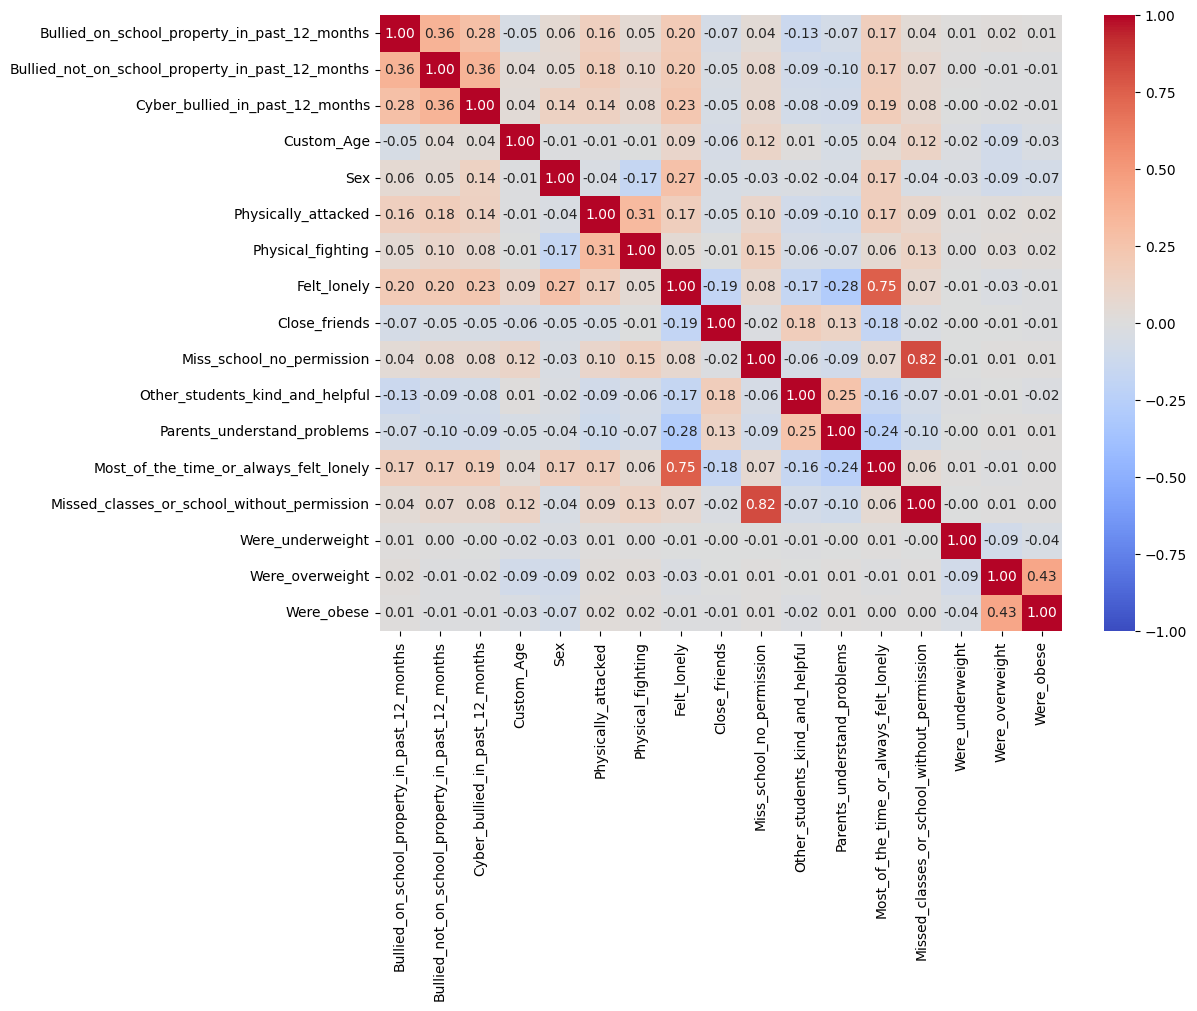

In [ ]:
# Plotar heatmap

fig, ax = plt.subplots(figsize=(11, 8))

sns.heatmap(dados_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax, vmin=-1, vmax=1)

plt.show()

> **O Coeficiente de correlação de Pearson**, utilizado acima, é uma medida que indica o grau de associação linear entre duas variáveis. Seu valor varia de -1 a 1, onde -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui na mesma proporção), 0 indica nenhuma correlação e 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta na mesma proporção).

### <font color=#007172> **Policórica**

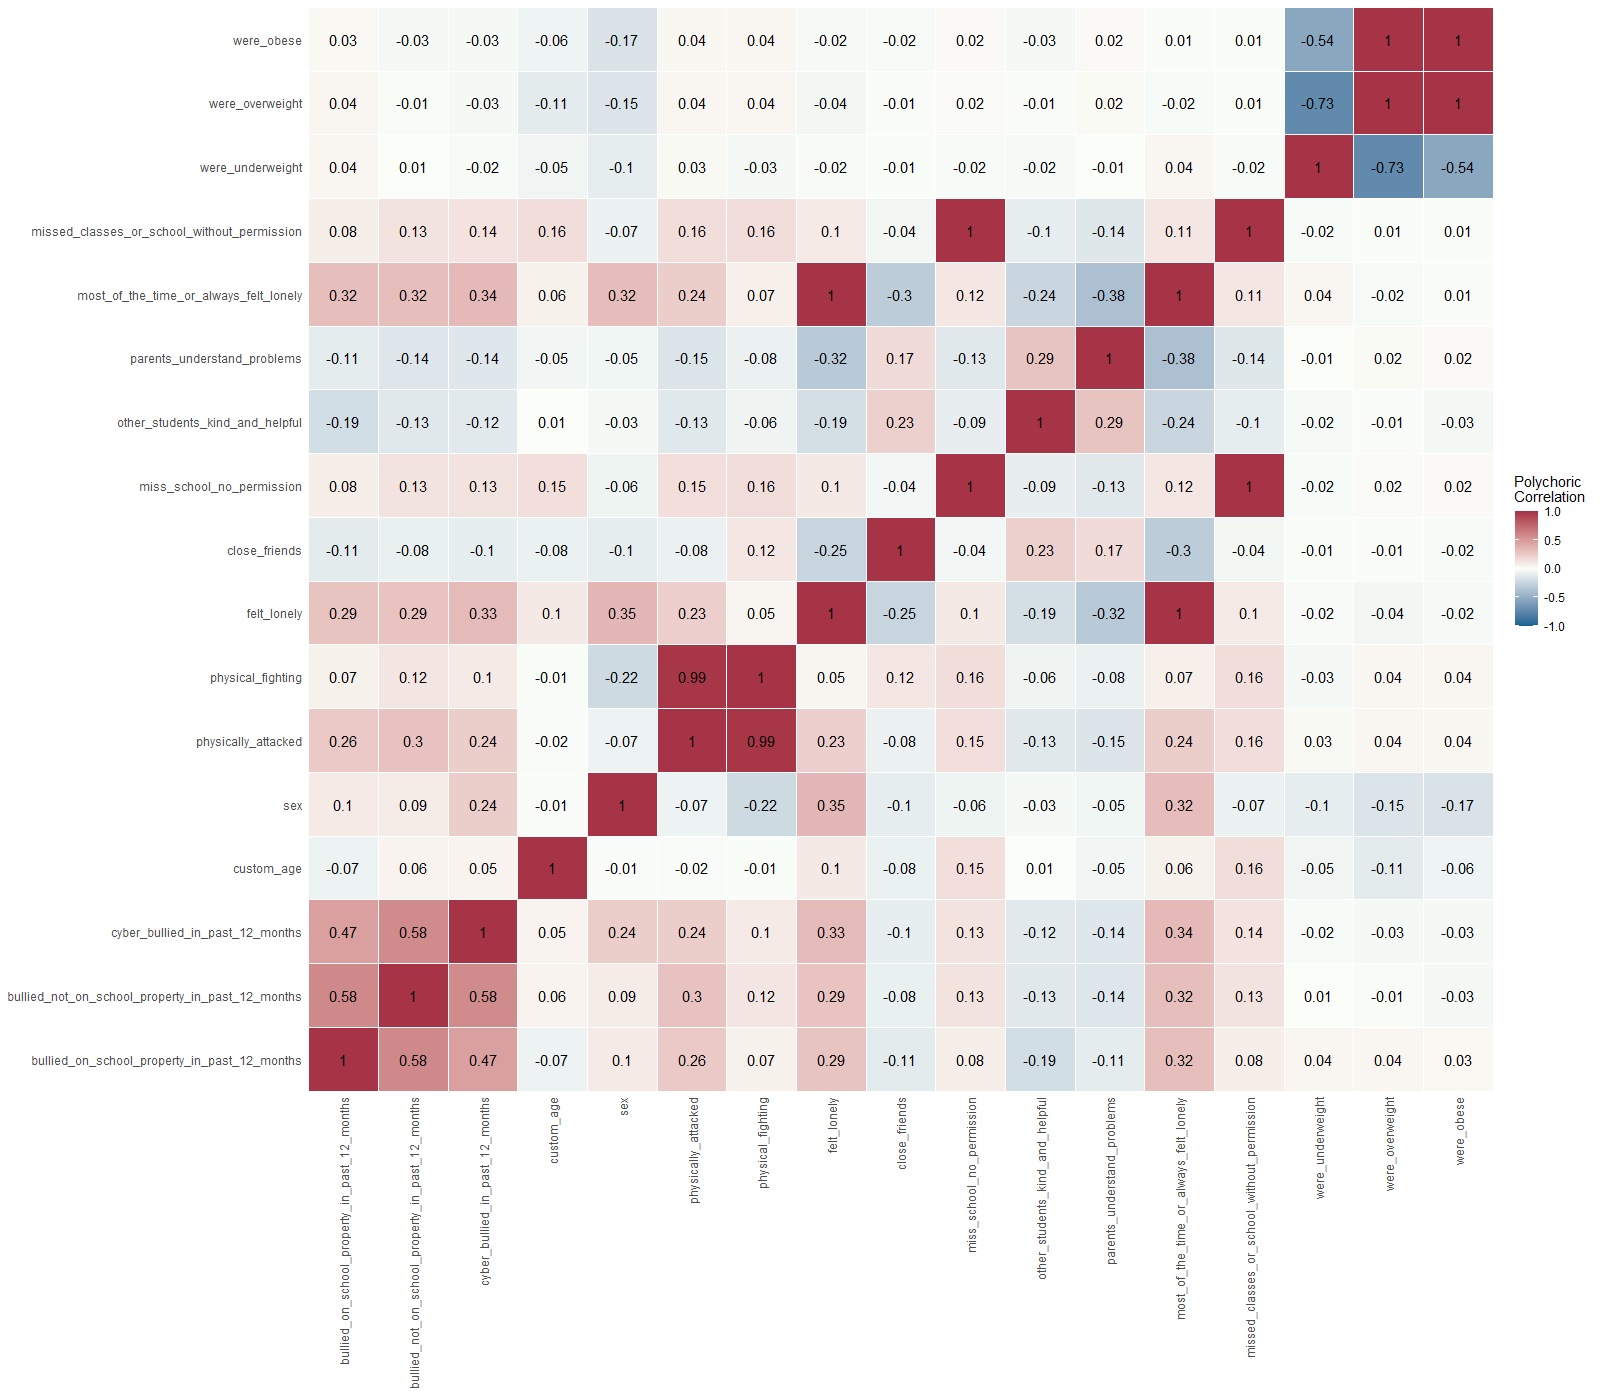

Destacamos abaixo o código da linguagem R utilizado para desenvolver a matriz de correlação policórica:

```# pacotes utilizados
library(qgraph)
library(tidyverse)
library(readr)
library(janitor)
library(sjmisc)
library(ggplot2)
library(reshape2)
library(skimr)
library(stats)

# carregar os dados
df_bullying <- Bullying_2018 # 56981 18

# visualizar as variaveis
names(df_bullying)

# limpeza dos dados
df_bullying <- clean_names(df_bullying)
names(df_bullying) # retirar a letra maiuscula do nome de cada variavel

# checar dados
glimpse(df_bullying)
# Rows: 56,981
# Columns: 18
# tipo: chr; record = dbl

# modificar as variaveis binarias; substituir yes e no
df_bullying2 <- df_bullying %>%
  mutate_at(vars(bullied_on_school_property_in_past_12_months,
                 bullied_not_on_school_property_in_past_12_months,
                 cyber_bullied_in_past_12_months,
                 most_of_the_time_or_always_felt_lonely,
                 missed_classes_or_school_without_permission,
                 were_underweight,
                 were_overweight,
                 were_obese
                 ),
            funs(case_when(
            . == "Yes" ~1,
            . == "No" ~0,
            )))

# dados ordinais
# idade
library(misty)
freq(df_bullying$custom_age, round = 2) # retorna uma tabela com frequencia e porcentagem 

df_bullying2 <- df_bullying2 %>%
  mutate_at(vars(custom_age
                 ),
            funs(case_when(
              . == "11 years old or younger" ~0,
              . == "12 years old" ~1,
              . == "13 years old" ~2,
              . == "14 years old" ~3,
              . == "15 years old" ~4,
              . == "16 years old" ~5,
              . == "17 years old" ~6,
              . == "18 years old or older" ~7
            )))
# genero
freq(df_bullying$sex)

df_bullying2 <- df_bullying2 %>%
  mutate_at(vars(sex
  ),
  funs(case_when(
    . == "Female" ~1,
    . == "Male" ~0
  )))

# briga e ataque fisico
freq(df_bullying2$physically_attacked)
freq(df_bullying2$physical_fighting)

df_bullying2 <- df_bullying2 %>%
  mutate_at(vars(physically_attacked, physical_fighting
  ),
  funs(case_when(
    . == "0 times" ~0,
    . == "1 time" ~1,
    . == "2 or 3 times" ~2,
    . == "4 or 5 times" ~3,
    . == "6 or 7 times" ~4,
    . == "8 or 9 times" ~5,
    . == "10 or 11 times" ~6,
    . == "12 or more times" ~7
  )))

# sentir-se sozinho
freq(df_bullying2$felt_lonely)
freq(df_bullying2$other_students_kind_and_helpful)
freq(df_bullying2$parents_understand_problems)

df_bullying2 <- df_bullying2 %>%
  mutate_at(vars(felt_lonely, other_students_kind_and_helpful, parents_understand_problems
  ),
  funs(case_when(
    . == "Never" ~0,
    . == "Rarely" ~1,
    . == "Sometimes" ~2,
    . == "Most of the time" ~3,
    . == "Always" ~4
  )))

# amigos proximos
freq(df_bullying2$close_friends)

df_bullying2 <- df_bullying2 %>%
  mutate_at(vars(close_friends
  ),
  funs(case_when(
    . == "0" ~0,
    . == "1" ~1,
    . == "2" ~2,
    . == "3 or more" ~3
  )))

# frequencia escolar
freq(df_bullying2$miss_school_no_permission)

df_bullying2 <- df_bullying2 %>%
  mutate_at(vars(miss_school_no_permission
  ),
  funs(case_when(
    . == "0 days" ~0,
    . == "1 or 2 days" ~1,
    . == "3 to 5 days" ~2,
    . == "6 to 9 days" ~3,
    . == "10 or more days" ~4
  )))

# checar os dados
glimpse(df_bullying2)
# Rows: 56,981
# Columns: 18
# tipo: dbl; genero = chr

# analise de correlacao
correlacao_b <- df_bullying2 %>%
  select(-record) %>%
  cor_auto()

# heatmap
melted_cormat <- melt(correlacao_b)

library(knitr)
library(gt)
library(tidyverse, warn.conflict=F)

heatmap_cor <- ggplot(melted_cormat, aes(Var2, Var1, fill = value, label=round(value,2)))+
  geom_tile(color = "white")+
  labs(x = NULL, y = NULL, fill = "Polychoric\nCorrelation") +
  # map a red, white and blue color scale to correspond to -1:1 sequential gradient
  scale_fill_gradient2(mid="#FBFEF9",low="#0C6291",high="#A63446", limits=c(-1,1)) +
  geom_text() +
  theme_minimal() +
  scale_x_discrete(expand=c(0,0)) +
  scale_y_discrete(expand=c(0,0)) +
  theme(axis.title.x=element_blank(), axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))
heatmap_cor```





#### <font color=#007172>**Conclusões**</font>

Para início do trabalho, foi realizada a Correlação de Pearson onde foi possível identifcar a existência de correlações positivas e negativas entre as variáveis. 

Porém, para aprofundamento e sequência da análise, optou-se pelo uso da Correlação Policórica, que é a mais indicada para avaliar a relação entre variáveis categóricas.

Pela comparação das duas matrizes de correlação, é possível verificar que a policórica fornece um resultado melhor ajustado aos tipos de dados do nosso dataset.

O valor do coeficiente de correlação varia entre -1 e 1. Quanto mais próximo de -1 ele indica que existe uma relação negativa entre as variáveis, ou seja, conforme uma aumenta a outra diminui. Por outro lado, quanto mais próximo o valor for de 1 indica a existência de uma relação positiva, o que significa que quando uma variável aumenta (ou diminui), a outra variável segue no mesmo sentido.

A análise de correlação policórica é de extrema importância, pois será um dos pontos levados em consideração para a escolha das varáveis que irão compor os modelos de previsão de bullying.

**Quais variáveis são mais correlacionadas e quais são as menos correlacionadas?**


<font color=#007172>**1.**</font> A partir da análise da Matriz de Correlação Policórica identificamos que as variáveis com maior correlação são as seguintes:

  * Missed_classes_or_school_without_permission e miss_school_with_permission **(1)** 

  * Most_of_the_time_or_always_felt_lonely e felt lonely **(1)**

  * Were overweight e Were_obese **(1)**

  * physically_attacked e physical_fighting **(0.99)**


<font color=#007172>**2.**</font> Correlação entre as variaveis de bullying

- Correlacionando a variavel *Bullied_on_school_property_in_past_12_months* com:

  * Bullied_not_on_school_property_in_past_12_months (0.58)
  * Cyber_bullied_in_past_12_months (0.47)
  * Most_of_the_time_or_always_felt_lonely (0.32)
  * Felt_lonely(0.29)
  * Physically_attacked (0.26)

- Correlacionando a variavel *Bullied_not_on_school_property_in_past_12_months* com:

  * Bullied_on_school_property_in_past_12_months (0.58)
  * Cyber_bullied_in_past_12_months (0.58)
  * Most_of_the_time_or_always_felt_lonely (0.32)
  * Physically_attacked (0.30)
  * Felt_lonely(0.29)


- Correlacionando a variavel *Cyber_bullied_in_past_12_months* com:

  * Bullied_not_on_school_property_in_past_12_months (0.58)
  * Bullied_on_school_property_in_past_12_months (0.47)
  * Most_of_the_time_or_always_felt_lonely (0.34)
  * Felt_lonely(0.33)
  * Physically_attacked (0.24)
  * Sex (0.24)

**Conclusões sobre as variaveis de bullying, baseando-se no heatmap:**
Os estudantes que sofreram bullying dentro da escola
tiveram correlação maior com quem sofreu fora da escola e
e por meio de cyberbullying. Ponto de atenção é que o sentimento de estar sozinho também foi maior nesses casos.

Com relação aos que sofreram bullying fora da escola, é alta a correlação com os que sofreram na escola e cyberbullying, e a correlação aumenta quando se trata de ataques fisicos, se comparado ao anterior.

Sobre cyberbullying, a maior correlação é com bullying sofrido fora da escola, e com sentimento de solidão. Nesse tipo de bullying o componente de gênero aparece com uma correlação mais forte, diferente dos demais tipos.


# <font color=#025259>**Análise exploratória dos dados** </font>


## <font color=#007172>**Análise por gênero** 

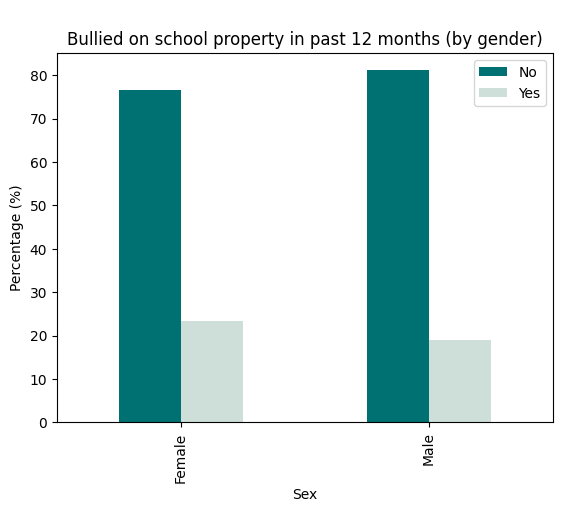

In [ ]:
# Substituindo espaços em branco e outros caracteres por NaN
dados_Nan = dados.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

# Filtrando os dados para remover valores nulos
dados_filtrados = dados_Nan.dropna(subset=['Bullied_on_school_property_in_past_12_months', 'Sex'])

# Contagem das ocorrências e agrupamento por sexo e bullying
grupo = dados_filtrados.groupby(['Sex', 'Bullied_on_school_property_in_past_12_months']).size().unstack()

# Cálculo das porcentagens e arredondamento
porcentagem = grupo.div(grupo.sum(axis=1), axis=0) * 100
porcentagem = porcentagem.round(2)

# Plotagem do gráfico de barras
cores = ['#007172', '#cedfd9']
porcentagem.plot(kind='bar', color= cores)
plt.title('\nBullied on school property in past 12 months (by gender)')
plt.xlabel('Sex')
plt.ylabel('Percentage (%)')
plt.legend(['No', 'Yes'])

plt.show()

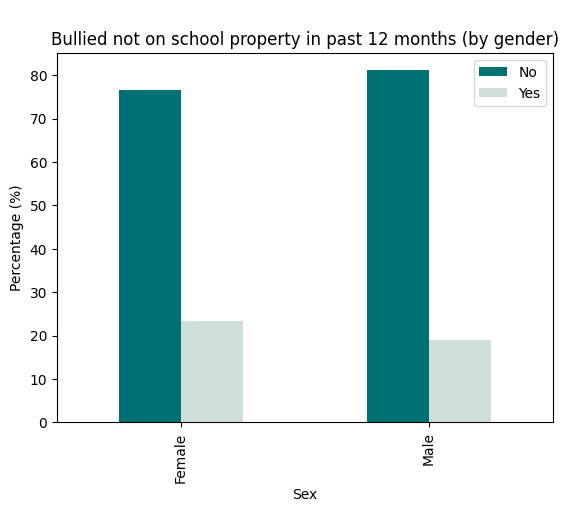

In [ ]:
# Substituindo espaços em branco e outros caracteres por NaN
dados_Nan = dados.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

# Filtrando os dados para remover valores nulos
dados_filtrados_bns = dados_Nan.dropna(subset=['Bullied_not_on_school_property_in_past_12_months', 'Sex'])

# Contagem das ocorrências e agrupamento por sexo e bullying
grupo = dados_filtrados_bns.groupby(['Sex', 'Bullied_not_on_school_property_in_past_12_months']).size().unstack()

# Cálculo das porcentagens e arredondamento
porcentagem_bns = grupo.div(grupo.sum(axis=1), axis=0) * 100
porcentagem_bns = porcentagem.round(2)

# Plotagem do gráfico de barras
cores = ['#007172', '#cedfd9']
porcentagem_bns.plot(kind='bar', color=cores)
plt.title('\nBullied not on school property in past 12 months (by gender)')
plt.xlabel('Sex')
plt.ylabel('Percentage (%)')
plt.legend(['No', 'Yes'])
plt.show()


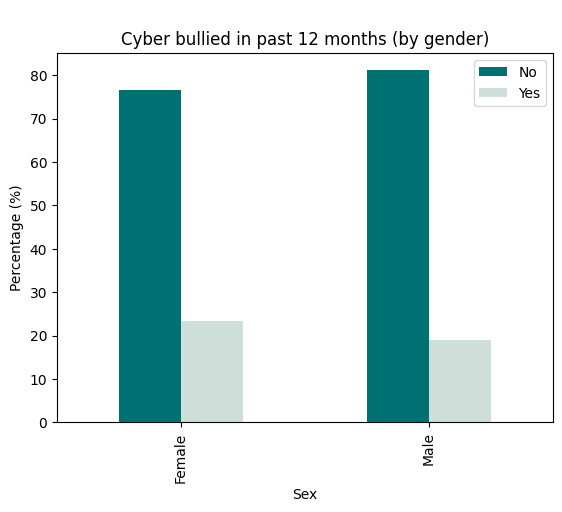

In [ ]:
# Substituindo espaços em branco e outros caracteres por NaN
dados_Nan = dados.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

# Filtrando os dados para remover valores nulos
dados_filtrados_cb = dados_Nan.dropna(subset=['Cyber_bullied_in_past_12_months', 'Sex'])

# Contagem das ocorrências e agrupamento por sexo e bullying
grupo = dados_filtrados_cb.groupby(['Sex', 'Cyber_bullied_in_past_12_months']).size().unstack()

# Cálculo das porcentagens e arredondamento
porcentagem_cb = grupo.div(grupo.sum(axis=1), axis=0) * 100
porcentagem_cb = porcentagem.round(2)

# Plotagem do gráfico de barras
cores = ['#007172', '#cedfd9']
porcentagem_cb.plot(kind='bar', color=cores)
plt.title('\nCyber bullied in past 12 months (by gender)')
plt.xlabel('Sex')
plt.ylabel('Percentage (%)')
plt.legend(['No', 'Yes'])
plt.show()

**Conclusões:**

Para essa análise, foram desconsiderados os campos deixados em branco e consideradas apenas as respostas válidas (Yes/No).

A base de dados é composta por cerca de 51% de pessoas do gênero feminino e 47% do gênero masculino, o que influencia diretamente nos resultados apresentados nos gráficos acima. Observou-se que o gênero feminino foi mais afetado pelo bullying em geral, sendo que o tipo de bullying que apresentou a maior disparidade entre os gêneros foi o cyberbullying, com uma proporção de aproximadamente 27% para o gênero feminino e 15% para o masculino.

### <font color=#007172> **Visualizações comparando bullying por gênero e idade**

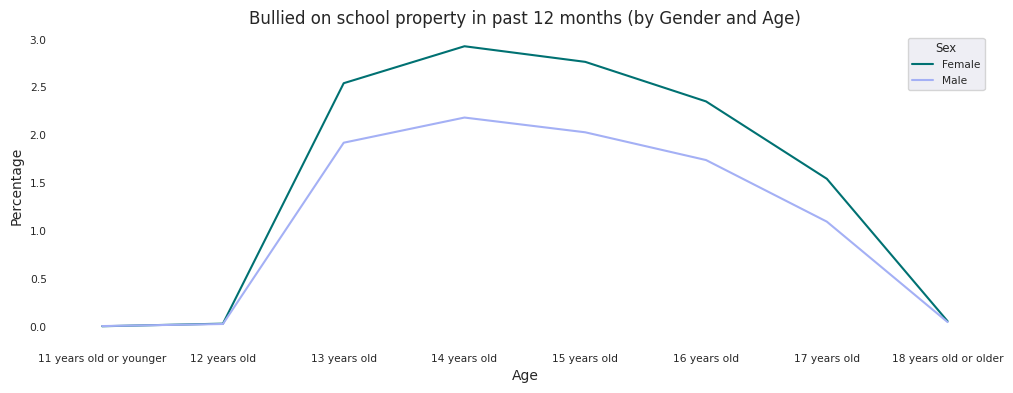

In [ ]:
# Gráfico comparando bullying sofrido por gênero e idade dentro da escola nos últimos 12 meses 

cores = ['#007172', '#a4b0f5']
dados = dados.replace(' ', np.nan)
grupo = dados.groupby(['Bullied_on_school_property_in_past_12_months', 'Sex', 'Custom_Age']).size().reset_index(name='count')
grupo['percent'] = grupo['count'] / grupo['count'].sum() * 100
grupo_sim = grupo.loc[grupo['Bullied_on_school_property_in_past_12_months'] == 'Yes']

plt.figure(figsize=(12, 4))
sns.set_theme(font_scale=0.7)
fig = sns.lineplot(
    data=grupo_sim, x="Custom_Age", y="percent",
    hue="Sex", palette=cores, errorbar=None,
)
fig.set_title('Bullied on school property in past 12 months (by Gender and Age)', fontsize=12)
fig.set_facecolor('none')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.set_xlabel('Age', fontsize=10)
fig.set_ylabel('Percentage', fontsize=10)
plt.show()

Os resultados do estudo indicam que, no gênero feminino, a faixa etária que apresenta maior incidência de bullying na escola é dos 13 aos 17 anos, com maior concentração nas idades de 13 e 15 anos. Já no gênero masculino, o maior volume de casos ocorre entre os 13 e 16 anos, com maior concentração aos 14 anos. É importante ressaltar que o gênero feminino sofreu mais com o bullying durante todo o ciclo escolar abordado neste estudo, sendo necessário atenção especial para essa questão.

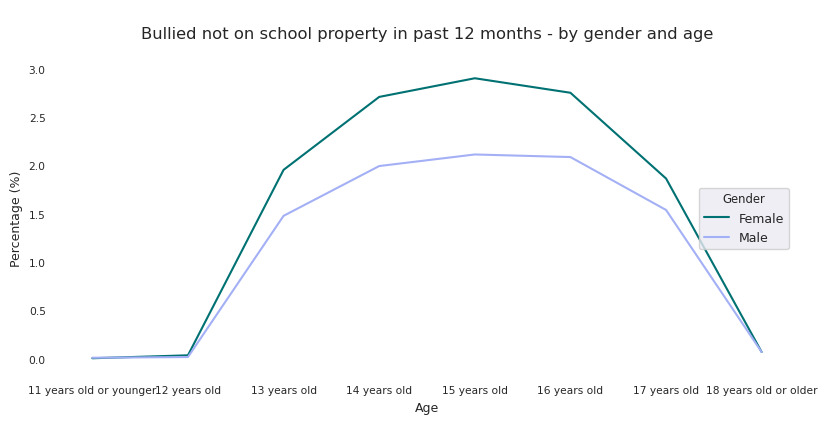

In [ ]:
# Gráfico comparando bullying sofrido por gênero e idade fora da escola nos últimos 12 meses 

cores = ['#007172', '#a4b0f5']
dados = dados.replace(' ', np.nan)
grupo = dados.groupby(['Bullied_not_on_school_property_in_past_12_months', 'Sex', 'Custom_Age']).size().reset_index(name='count')
grupo['percent'] = grupo['count'] / grupo['count'].sum() * 100
grupo_sim = grupo.loc[grupo['Bullied_not_on_school_property_in_past_12_months'] == 'Yes']

plt.figure( figsize=(9.5, 4))
sns.set_theme(font_scale=0.7)
fig = sns.lineplot(
    data=grupo_sim, x="Custom_Age", y="percent",
    hue="Sex", palette=cores, errorbar=None,
)
fig.set_title('\nBullied not on school property in past 12 months - by gender and age\n', fontdict = {'fontsize': 11.8})
fig.set_facecolor('none')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.set_xlabel('Age', fontsize=9)
fig.set_ylabel('Percentage (%)', fontsize=9)
fig.legend(title='Gender', loc='center right', fontsize=9)

plt.show(fig)

Podemos observar que a incidência de bullying fora da escola é mais alta entre os 14 e 17 anos para ambos os gêneros. No entanto, o gênero feminino apresenta uma maior proporção de casos de bullying fora da escola em todas as faixas etárias abordadas no estudo.

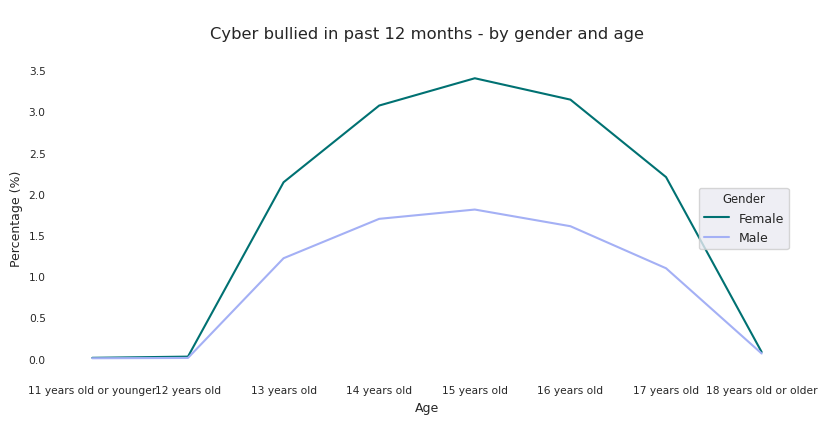

In [ ]:
# Gráfico comparando bullying sofrido por gênero e idade na internet nos últimos 12 meses 

cores = ['#007172', '#a4b0f5']
dados = dados.replace(' ', np.nan)
grupo = dados.groupby(['Cyber_bullied_in_past_12_months', 'Sex', 'Custom_Age']).size().reset_index(name='count')
grupo['percent'] = grupo['count'] / grupo['count'].sum() * 100
grupo_sim = grupo.loc[grupo['Cyber_bullied_in_past_12_months'] == 'Yes']

plt.figure( figsize=(9.5, 4))
sns.set_theme(font_scale=0.7)
fig = sns.lineplot(
    data=grupo_sim, x="Custom_Age", y="percent",
    hue="Sex", palette=cores, errorbar=None,
)
fig.set_title('\nCyber bullied in past 12 months - by gender and age\n', fontdict = {'fontsize': 11.8})
fig.set_facecolor('none')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.set_xlabel('Age', fontsize=9)
fig.set_ylabel('Percentage (%)', fontsize=9)
fig.legend(title='Gender', loc='center right', fontsize=9)

plt.show(fig)

É possível identificar um aumento no volume de casos de cyberbullying entre as idades de 14 a 16 anos, sendo que a faixa etária com maior incidência para ambos os gêneros é de 13 a 17 anos. Além disso, foi observado que o gênero feminino é mais afetado pelo cyberbullying durante todo o ciclo escolar analisado.


### <font color=#007172> **Visualizações comparando bullying apenas por gênero**

In [ ]:
# Definindo NaN

dados_cnull = dados.replace(' ', np.nan)

In [ ]:
# Filtrar apenas bullying na escola

df_bschool = dados_cnull.loc[dados_cnull['Bullied_on_school_property_in_past_12_months'] == 'Yes']
df_bschool['Bullied_on_school_property_in_past_12_months'].value_counts()

Yes    11903
Name: Bullied_on_school_property_in_past_12_months, dtype: int64

In [ ]:
# Tabela detalhando o sentimento de solidão experimentada por gênero

teste = df_bschool.groupby('Felt_lonely')['Sex'].value_counts(normalize=True)
teste = teste.mul(100).rename('Percent').round(1).reset_index()

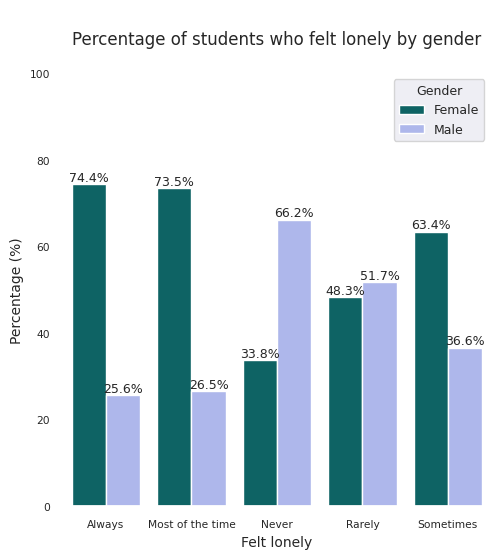

In [ ]:
# Porcentagem de alunos que se sentiram sozinhos por gênero

graf1 = sns.catplot(x='Felt_lonely', y='Percent', hue='Sex', kind='bar', data=teste, palette=cores)
graf1.ax.set_ylim(0,100)

for p in graf1.ax.containers:
    graf1.ax.bar_label(p, label_type='edge', labels=[f"{h.get_height():.1f}%" for h in p], fontsize=9)

graf1.ax.set_title('\nPercentage of students who felt lonely by gender\n', fontsize=12)
graf1.ax.set_facecolor('none')
graf1.ax.set_xlabel("Felt lonely", fontsize=10)
graf1.ax.set_ylabel("Percentage (%)", fontsize=10)
graf1._legend.remove()
graf1.ax.legend(title="Gender", title_fontsize=9, fontsize=9)


In [ ]:
# Quantidade de amigos próximos

teste = df_bschool.groupby('Close_friends')['Sex'].value_counts(normalize=True)
teste = teste.mul(100).rename('Percent').round(1).reset_index()

Text(34.52815, 0.5, 'Percentage (%)')

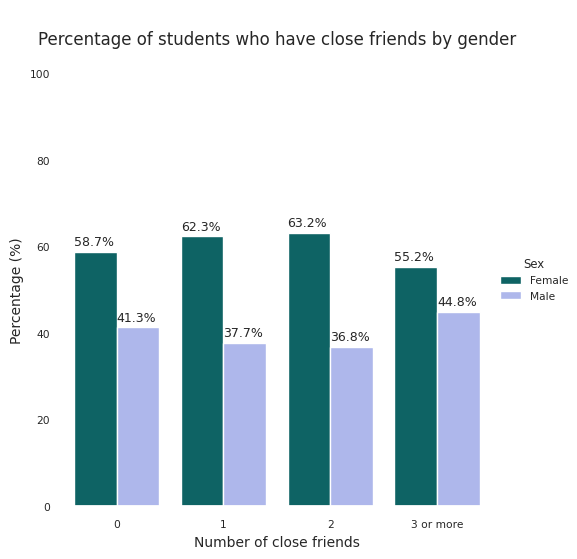

In [ ]:
# Porcentagem de estudantes que possuem amigos próximos por gênero

graf2 = sns.catplot(x='Close_friends', y='Percent', hue='Sex', kind='bar', data=teste, palette=cores)
graf2.ax.set_ylim(0,100)

for p in graf2.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() + 1.5
    graf2.ax.text(txt_x,txt_y,txt, fontsize=9)

graf2.ax.set_title('\nPercentage of students who have close friends by gender\n', fontsize=12)
graf2.ax.set_facecolor('none')
graf2.ax.set_xlabel("Number of close friends", fontsize=10)
graf2.ax.set_ylabel("Percentage (%)", fontsize=10)

In [ ]:
# Tabela com bulling sofrido na escola e na internet

teste = df_bschool.groupby('Cyber_bullied_in_past_12_months')['Sex'].value_counts(normalize=True)
teste = teste.mul(100).rename('Percent').round(1).reset_index()

Text(34.52815, 0.5, 'Percentage (%)')

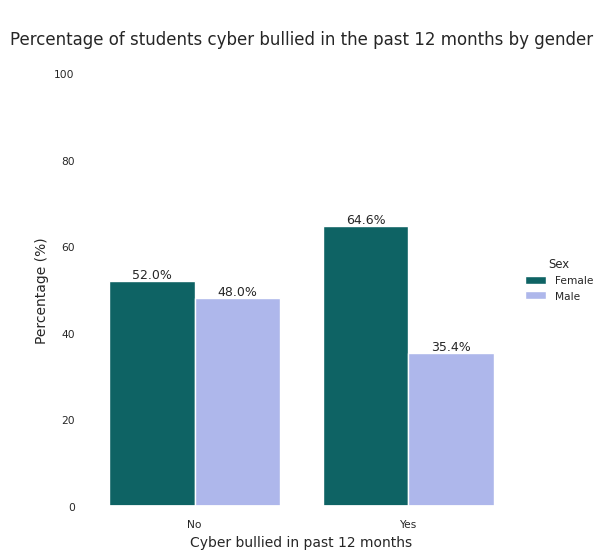

In [ ]:
# Porcentagem de estudantes que sofreram bullying pela internet no últimos 12 meses

graf3 = sns.catplot(x='Cyber_bullied_in_past_12_months', y='Percent', hue='Sex', kind='bar', data=teste, palette=cores)
graf3.ax.set_ylim(0,100)

for p in graf3.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 2
    txt_y = p.get_height()
    graf3.ax.text(txt_x, txt_y, txt, ha='center', va='bottom', fontsize=9)

graf3.ax.set_title('\nPercentage of students cyber bullied in the past 12 months by gender\n', fontsize=12)
graf3.ax.set_facecolor('none')
graf3.ax.set_xlabel("Cyber bullied in past 12 months", fontsize=10)
graf3.ax.set_ylabel("Percentage (%)", fontsize=10)

---

In [ ]:
# Filtrar apenas bullied_not_on_school_property_in_past_12_months

df_ntschool = dados_cnull.loc[dados_cnull['Bullied_not_on_school_property_in_past_12_months'] == 'Yes']
df_ntschool['Bullied_not_on_school_property_in_past_12_months'].value_counts()

Yes    12229
Name: Bullied_not_on_school_property_in_past_12_months, dtype: int64

In [ ]:
# Tabela detalhando o sentimento de solidão experimentada por gênero

teste2 = df_ntschool.groupby('Felt_lonely')['Sex'].value_counts(normalize=True)
teste2 = teste2.mul(100).rename('Percent').reset_index()

Text(34.52815, 0.5, 'Percentage (%)')

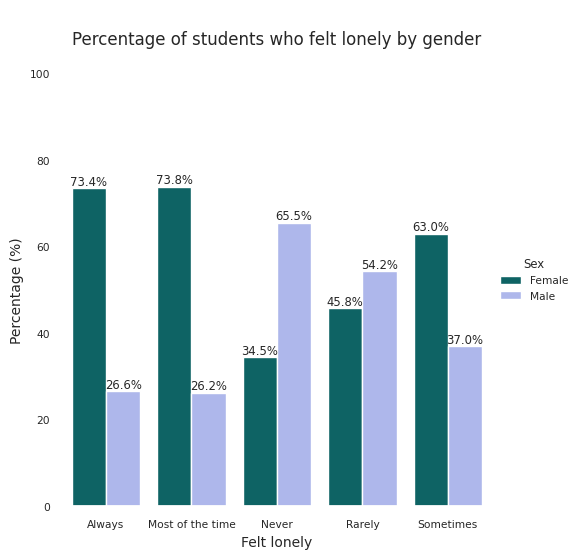

In [ ]:
# Porcentagem de alunos que se sentiram sozinhos por gênero fora da escola

graf1 = sns.catplot(x='Felt_lonely', y='Percent', hue='Sex', kind='bar', data=teste2, palette=cores)
graf1.ax.set_ylim(0,100)

for p in graf1.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 2
    txt_y = p.get_height()
    graf1.ax.text(txt_x,txt_y,txt, ha='center', va='bottom')

graf1.ax.set_title('\nPercentage of students who felt lonely by gender\n', fontsize=12)
graf1.ax.set_facecolor('none')
graf1.ax.set_xlabel("Felt lonely", fontsize=10)
graf1.ax.set_ylabel("Percentage (%)", fontsize=10)

In [ ]:
# Bullying fora da escola e cyberbullying

teste2 = df_ntschool.groupby('Cyber_bullied_in_past_12_months')['Sex'].value_counts(normalize=True)
teste2 = teste2.mul(100).rename('Percent').reset_index()

Text(34.52815, 0.5, 'Percentage (%)')

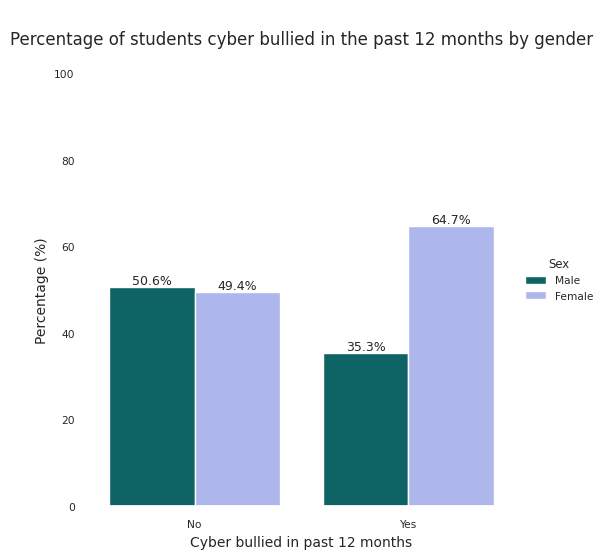

In [ ]:
# Gráfico porcentagem de estudantes que sofreram cyber bullying nos últimos 12 meses por gênero

graf2 = sns.catplot(x='Cyber_bullied_in_past_12_months', y='Percent', hue='Sex', kind='bar', data=teste2, palette=cores)
graf2.ax.set_ylim(0,100)

for p in graf2.ax.containers:
    graf2.ax.bar_label(p, label_type='edge', labels=[f"{h.get_height().round(1)}%" for h in p], fontsize=9)

graf2.ax.set_title('\nPercentage of students cyber bullied in the past 12 months by gender\n', fontsize=12)
graf2.ax.set_facecolor('none')
graf2.ax.set_xlabel("Cyber bullied in past 12 months", fontsize=10)
graf2.ax.set_ylabel("Percentage (%)", fontsize=10)

In [ ]:
# Filtrar apenas cyberbullying

df_cyberb = dados_cnull.loc[dados_cnull['Cyber_bullied_in_past_12_months'] == 'Yes']
df_cyberb['Cyber_bullied_in_past_12_months'].value_counts()

Yes    12197
Name: Cyber_bullied_in_past_12_months, dtype: int64

In [ ]:
# Tabela detalhando o sentimento de solidão experimentada por gênero

teste3 = df_cyberb.groupby('Felt_lonely')['Sex'].value_counts(normalize=True)
teste3 = teste3.mul(100).rename('Percent').reset_index()

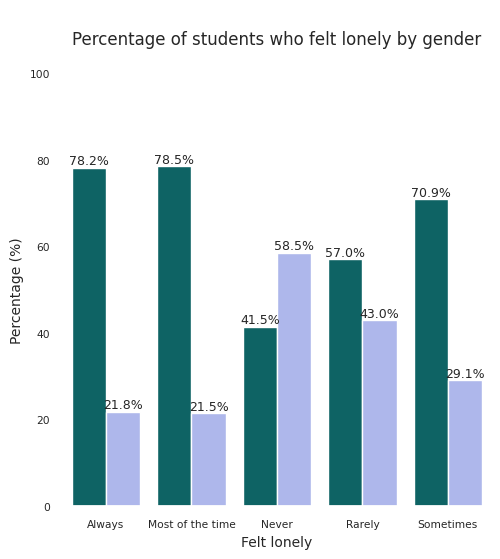

In [ ]:
# Gráfico com a porcentagem de estudantes que sentem solidão por gênero

graf1 = sns.catplot(x='Felt_lonely', y='Percent', hue='Sex', kind='bar', data=teste3, palette=cores)
graf1.ax.set_ylim(0,100)

for p in graf1.ax.containers:
    graf1.ax.bar_label(p, label_type='edge', labels=[f"{h.get_height():.1f}%" for h in p], fontsize=9)

graf1.ax.set_title('\nPercentage of students who felt lonely by gender\n', fontsize=12)
graf1.ax.set_facecolor('none')
graf1.ax.set_xlabel("Felt lonely", fontsize=10)
graf1.ax.set_ylabel("Percentage (%)", fontsize=10)
graf1._legend.remove()

In [ ]:
# Filtrar apenas amigos proximos

teste3 = df_cyberb.groupby('Close_friends')['Sex'].value_counts(normalize=True)
teste3 = teste3.mul(100).rename('Percent').reset_index()

Text(34.52815, 0.5, 'Percentage (%)')

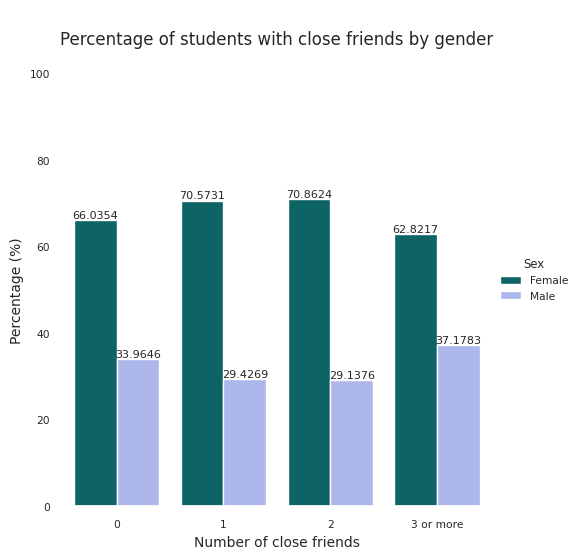

In [ ]:
# Gráfico com a Porcentagem de estudantes com amigos próximo por gênero

graf2 = sns.catplot(x='Close_friends', y='Percent', hue='Sex', kind='bar', data=teste3, palette=cores)
graf2.ax.set_ylim(0,100)

for p in graf2.ax.containers:
    graf2.ax.bar_label(p, label_type='edge', fontsize=8)

graf2.ax.set_title('\nPercentage of students with close friends by gender\n', fontsize=12)
graf2.ax.set_facecolor('none')
graf2.ax.set_xlabel("Number of close friends", fontsize=10)
graf2.ax.set_ylabel("Percentage (%)", fontsize=10)

Obs: as variáveis de ataque físico e briga também tem diferença entre os gêneros, talvez seja interessante adicionar esses gráficos aqui também (principalmente para bullying dentro e fora da escola)

### <font color=#007172> **Análise da idade média de pessoas que sofreram bullying por tipo de bullying**

In [ ]:
# Atribuindo dados a um novo dataframe

dados1 = dados.replace(' ', np.nan)

In [ ]:
# Ajustando idades para fins de cálculo

mapping_age_int = {'11 years old or younger': 11, '12 years old': 12, '13 years old': 13, '14 years old': 14, '15 years old':15,'16 years old': 16, '17 years old': 17, '18 years old or older' :18 }

In [ ]:
# Ajustando a coluna idade no dataframe

dados1['Custom_Age'].replace(mapping_age_int, inplace = True)

In [ ]:
dados1.dropna(subset=['Custom_Age'], inplace=True)
dados1['Custom_Age'].astype(int)

record
1        13
2        13
3        14
4        16
5        13
         ..
57091    16
57092    16
57093    16
57094    16
57095    16
Name: Custom_Age, Length: 56873, dtype: int64

In [ ]:
# Tabela Bullying sofrido na escola nos ultimos 12 meses

dados1.groupby(['Bullied_on_school_property_in_past_12_months']).mean().round(2)

<ipython-input-13-ecfac44f3ecd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados1.groupby(['Bullied_on_school_property_in_past_12_months']).mean().round(2)


,Custom_Age
Bullied_on_school_property_in_past_12_months,
No,14.94
Yes,14.78


In [ ]:
# Tabela Bullying sofrido fora da escola nos ultimos 12 meses

dados1.groupby(['Bullied_not_on_school_property_in_past_12_months']).mean().round(2)

<ipython-input-14-2449f90cae66>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados1.groupby(['Bullied_not_on_school_property_in_past_12_months']).mean().round(2)


,Custom_Age
Bullied_not_on_school_property_in_past_12_months,
No,14.88
Yes,15.01


In [ ]:
# Tabela Cyber bullying nos ultimos 12 meses

dados1.groupby(['Cyber_bullied_in_past_12_months']).mean().round(2)

<ipython-input-15-ef50bbe92bb2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados1.groupby(['Cyber_bullied_in_past_12_months']).mean().round(2)


,Custom_Age
Cyber_bullied_in_past_12_months,
No,14.88
Yes,15.00


A média de idade dos jovens que relataram sofrer bullying é de 15 anos, independentemente do tipo de bullying considerado.

## <font color=#007172> **Análise por peso**

In [ ]:
# Dados válidos referentes ao cyberbullying, ou seja, aqueles que foram preenchidos corretamente.

dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & ((dados1['Were_underweight'] == 'No') | (dados1['Were_underweight'] == 'Yes'))].shape[0]

8122

In [ ]:
# Cyber bullying X pessoas abaixo do peso

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Were_underweight'] == 'Yes')].shape[0]) / 8122 * 100

1.9083969465648856

In [ ]:
# Cyber bullying X sobrepeso

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Were_overweight'] == 'Yes')].shape[0]) / 8122 * 100

28.330460477714848

In [ ]:
# Cyber bullying X obesidade

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Were_obese'] == 'Yes')].shape[0]) / 8122 * 100

6.784043339079044

In [ ]:
# Dados válidos entre Bullying na escola, aqueles que foram devidamente preenchidos.

dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & ((dados1['Were_underweight'] == 'No') | (dados1['Were_underweight'] == 'Yes'))].shape[0]

7472

In [ ]:
# Bullying na escola x abaixo do peso

(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Were_underweight'] == 'Yes')].shape[0]) / 7472 * 100

2.288543897216274

In [ ]:
# Bullying na escola x sobrepeso

(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Were_overweight'] == 'Yes')].shape[0]) / 7472 * 100

31.571199143468952

In [ ]:
# Bullying na escola x obesidade

(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Were_obese'] == 'Yes')].shape[0]) / 7472 * 100

7.9362955032119915

In [ ]:
# Dados válidos entre Bullying fora da escola, aqueles que foram devidamente preenchidos.

dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & ((dados1['Were_underweight'] == 'No') | (dados1['Were_underweight'] == 'Yes'))].shape[0]

8050

In [ ]:
# Bullying fora da escola x abaixo do peso

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Were_underweight'] == 'Yes')].shape[0]) / 8050 * 100

2.062111801242236

In [ ]:
# Bullying fora da escola x sobrepeso

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Were_overweight'] == 'Yes')].shape[0]) / 8050 * 100

28.944099378881987

In [ ]:
# Bullying fora da escola x obesidade

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Were_obese'] == 'Yes')].shape[0]) / 8050 * 100

6.770186335403727

In [ ]:
# Média de pessoas abaixo do peso que relataram sofrer algum tipo de bullying

(1.9083969465648856 + 2.288543897216274 + 2.062111801242236) / 3

2.086350881674465

In [ ]:
# Média de pessoas com sobrepeso que relataram sofrer algum tipo de bullying

(28.330460477714848 + 31.571199143468952 + 28.944099378881987) / 3

29.615253000021927

In [ ]:
# Média de pessoas com obesidade que relataram sofrer algum tipo de bullying

(6.784043339079044 + 7.9362955032119915 + 6.770186335403727) / 3

7.163508392564921

Observa-se que os jovens com excesso de peso são os que relataram maior incidência de bullying no último ano, seguidos pelos alunos com obesidade:

29,6% dos jovens com excesso de peso sofreram bullying no último ano.
7,16% dos jovens com obesidade sofreram bullying no último ano.
2,08% dos jovens abaixo do peso sofreram bullying no último ano.

## <font color=#007172> **Análise por idade dos participantes**


#### <font color=#007172> **Bullying na escola por idade**



In [ ]:
# Total de respostas válidas sobre bullying na escola aos 13

dados1[(dados1['Custom_Age'] == 13) & ((dados1['Bullied_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

10344

In [ ]:
# Total de respostas válidas sobre bullying na escola aos 14

dados1[(dados1['Custom_Age'] == 14) & ((dados1['Bullied_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

12647

In [ ]:
# Total de respostas válidas sobre bullying na escola aos 15

dados1[(dados1['Custom_Age'] == 15) & ((dados1['Bullied_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

12499

In [ ]:
# Total de respostas válidas sobre bullying na escola aos 16

dados1[(dados1['Custom_Age'] == 16) & ((dados1['Bullied_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

11529

In [ ]:
# Total de respostas válidas sobre bullying na escola aos 17

dados1[(dados1['Custom_Age'] == 17) & ((dados1['Bullied_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

8064

In [ ]:
# Bullying na escola x 13 anos
(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 13)].shape[0]) / 10344 * 100

24.11059551430781

In [ ]:
# Bullying na escola x 14 anos

(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 14)].shape[0]) / 12647 * 100

22.590337629477347

In [ ]:
# Bullying na escola x 15 anos
(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 15)].shape[0]) / 12499 * 100

21.38571085686855

In [ ]:
# Bullying na escola x 16 anos

(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 16)].shape[0]) / 11529 * 100

19.80223783502472

In [ ]:
# Bullying na escola x 17 anos

(dados1[(dados1['Bullied_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 17)].shape[0]) / 8064 * 100

18.24156746031746

As faixas etárias de 11, 12 e 18 anos foram excluídas da análise devido à escassez de dados disponíveis. Entre as faixas etárias com quantidade relevante de dados, observa-se uma tendência de redução do bullying dentro da escola à medida que os adolescentes crescem.

- Bullying na escola aos 13 anos: 24,1%
- Bullying na escola aos 14 anos: 22,6%
- Bullying na escola aos 15 anos: 21,4%
- Bullying na escola aos 16 anos: 19,8%
- Bullying na escola aos 17 anos: 18,2%

#### <font color=#007172> **Bullying fora da escola por idade**

In [ ]:
# Total de respostas válidas sobre bullying fora da escola aos 13

dados1[(dados1['Custom_Age'] == 13) & ((dados1['Bullied_not_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

10494

In [ ]:
# Total de respostas válidas sobre bullying fora da escola aos 14

dados1[(dados1['Custom_Age'] == 14) & ((dados1['Bullied_not_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

12826

In [ ]:
# Total de respostas válidas sobre bullying fora da escola aos 15

dados1[(dados1['Custom_Age'] == 15) & ((dados1['Bullied_not_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

12686

In [ ]:
# Total de respostas válidas sobre bullying fora da escola aos 16

dados1[(dados1['Custom_Age'] == 16) & ((dados1['Bullied_not_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

11649

In [ ]:
# Total de respostas válidas sobre bullying fora da escola aos 17

dados1[(dados1['Custom_Age'] == 17) & ((dados1['Bullied_not_on_school_property_in_past_12_months'] == 'No') | (dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes'))].shape[0]

8164

In [ ]:
# Bullying fora da escola x 13 anos

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 13)].shape[0]) / 10494 * 100

18.48675433581094

In [ ]:
# Bullying fora da escola x 14 anos

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 14)].shape[0]) / 12826 * 100

20.78590363324497

In [ ]:
# Bullying fora da escola x 15 anos

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 15)].shape[0]) / 12686 * 100

22.308056124862052

In [ ]:
# Bullying fora da escola x 16 anos

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 16)].shape[0]) / 11649 * 100

23.486994591810458

In [ ]:
# Bullying fora da escola x 17 anos

(dados1[(dados1['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 17)].shape[0]) / 8164 * 100

23.40764331210191

As faixas etárias de 11, 12 e 18 anos foram excluídas da análise devido à escassez de dados disponíveis. Entre as faixas etárias com quantidade relevante de dados, observa-se que o bullying fora da escola tende a aumentar à medida que os adolescentes crescem.

- Bullying fora da escola aos 13 anos: 18,5%
- Bullying fora da escola aos 14 anos: 20,8%
- Bullying fora da escola aos 15 anos: 22,3%
- Bullying fora da escola aos 16 anos: 23,5%
- Bullying fora da escola aos 17 anos: 23,4%

#### <font color=#007172> **Cyber Bullying por idade**

In [ ]:
# Total de respostas válidas sobre Cyber bullying aos 13

dados1[(dados1['Custom_Age'] == 13) & ((dados1['Cyber_bullied_in_past_12_months'] == 'No') | (dados1['Cyber_bullied_in_past_12_months'] == 'Yes'))].shape[0]

10466

In [ ]:
# Total de respostas válidas sobre Cyber bullying aos 14

dados1[(dados1['Custom_Age'] == 14) & ((dados1['Cyber_bullied_in_past_12_months'] == 'No') | (dados1['Cyber_bullied_in_past_12_months'] == 'Yes'))].shape[0]

12801

In [ ]:
# Total de respostas válidas sobre Cyber bullying aos 15

dados1[(dados1['Custom_Age'] == 15) & ((dados1['Cyber_bullied_in_past_12_months'] == 'No') | (dados1['Cyber_bullied_in_past_12_months'] == 'Yes'))].shape[0]

12680

In [ ]:
# Total de respostas válidas sobre Cyber bullying aos 16

dados1[(dados1['Custom_Age'] == 16) & ((dados1['Cyber_bullied_in_past_12_months'] == 'No') | (dados1['Cyber_bullied_in_past_12_months'] == 'Yes'))].shape[0]

11635

In [ ]:
# Total de respostas válidas sobre Cyber bullying aos 17

dados1[(dados1['Custom_Age'] == 17) & ((dados1['Cyber_bullied_in_past_12_months'] == 'No') | (dados1['Cyber_bullied_in_past_12_months'] == 'Yes'))].shape[0]

8162

In [ ]:
# Cyber bullying x 13 anos

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 13)].shape[0]) / 10466 * 100

18.068029810815975

In [ ]:
# Cyber bullying x 14 anos

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 14)].shape[0]) / 12801 * 100

21.07647840012499

In [ ]:
# Cyber bullying x 15 anos

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 15)].shape[0]) / 12680 * 100

23.16246056782334

In [ ]:
# Cyber bullying x 16 anos

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 16)].shape[0]) / 11635 * 100

23.04254404813064

In [ ]:
# Cyber bullying x 17 anos

(dados1[(dados1['Cyber_bullied_in_past_12_months'] == 'Yes') & (dados1['Custom_Age'] == 17)].shape[0]) / 8162 * 100

22.715020828228376

As faixas de 11, 12 e 18 anos foram excluídas devido à escassez de dados para análise. Entre as faixas etárias com uma quantidade significativa de dados, observa-se que o cyber bullying tende a aumentar à medida que os adolescentes crescem.

- Cyber bullying x 13 anos: 18%
- Cyber bullying x 14 anos: 21%
- Cyber bullying x 15 anos: 23.1%
- Cyber bullying x 16 anos: 23%
- Cyber bullying x 17 anos: 22.7%

## <font color=#007172> **Análise da média de amigos próximos por tipos de bullying**


In [ ]:
# Criar um novo dataframe para atribuir as médias da quantidade de amigos próximos

dados_media = dados.replace(' ', np.nan)
mapping_CF = {'0': 0, '1': 1, '2': 2, '3 or more':3 }
dados_media['Close_friends'].replace(mapping_CF, inplace = True)
dados_media.dropna(subset=['Close_friends'], inplace=True)
dados_media['Close_friends'].astype(int)
dados.head(2)

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
record,,,,,,,,,,,,,,,,,
1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,


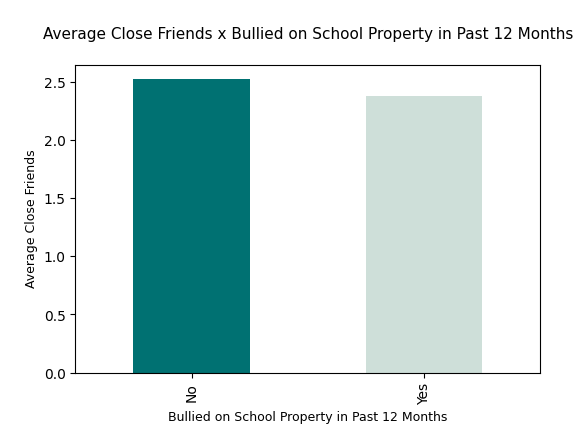

In [ ]:
# Gráfico de bullying na escola nos últimos 12 meses pela média de amigos próximos

dados_limpos = dados_media[['Close_friends', 'Bullied_on_school_property_in_past_12_months']].dropna()
dados_agrupados = dados_limpos.groupby('Bullied_on_school_property_in_past_12_months')['Close_friends'].mean()
cores = ['#007172', '#cedfd9']

fig, ax = plt.subplots(figsize=(6, 4))
dados_agrupados.plot(kind='bar', color=cores, ax=ax)
ax.set_title('\nAverage Close Friends x Bullied on School Property in Past 12 Months\n', fontsize=11)
ax.set_xlabel('Bullied on School Property in Past 12 Months', fontsize=9)
ax.set_ylabel('\nAverage Close Friends', fontsize=9)
ax.set_facecolor('none')

plt.show()

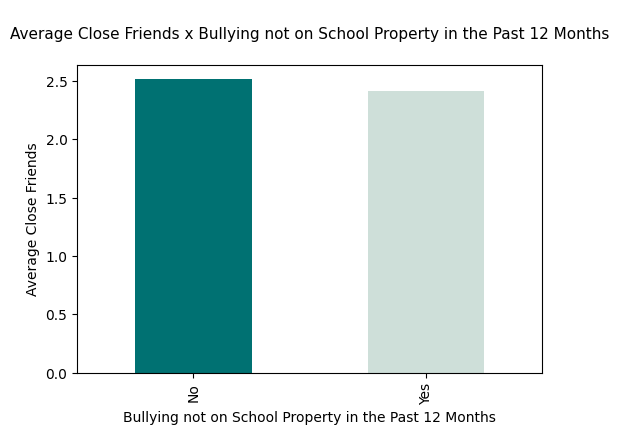

In [ ]:
# Gráfico de bullying fora da escola nos últimos 12 meses pela média de amigos próximos

dados_limpos = dados_media[['Close_friends', 'Bullied_not_on_school_property_in_past_12_months']].dropna()
dados_agrupados = dados_limpos.groupby('Bullied_not_on_school_property_in_past_12_months')['Close_friends'].mean()
cores = ['#007172', '#cedfd9']

fig, ax = plt.subplots(figsize=(6, 4))
dados_agrupados.plot(kind='bar', color=cores, ax=ax)
ax.set_title('\nAverage Close Friends x Bullying not on School Property in the Past 12 Months\n', fontsize=11)
ax.set_xlabel('Bullying not on School Property in the Past 12 Months', fontsize=10)
ax.set_ylabel('Average Close Friends', fontsize=10)
ax.set_facecolor('none')

plt.show()

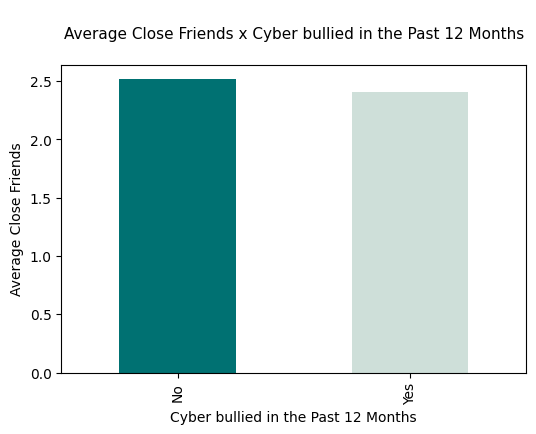

In [ ]:
# Gráfico de cyber bullying nos últimos 12 meses pela média de amigos próximos

dados_limpos = dados_media[['Close_friends', 'Cyber_bullied_in_past_12_months']].dropna()
dados_agrupados = dados_limpos.groupby('Cyber_bullied_in_past_12_months')['Close_friends'].mean()
cores = ['#007172', '#cedfd9']

fig, ax = plt.subplots(figsize=(6, 4))
dados_agrupados.plot(kind='bar', color=cores, ax=ax)
ax.set_title('\nAverage Close Friends x Cyber bullied in the Past 12 Months\n', fontsize=11)
ax.set_xlabel('Cyber bullied in the Past 12 Months', fontsize=10)
ax.set_ylabel('Average Close Friends', fontsize=10)
ax.set_facecolor('none')  

plt.show()

A média de amigos próximos é de 2,5 por participante, independentemente de terem sofrido algum tipo de bullying ou não. Portanto, esse dado pode não indicar nenhuma influência nos casos de bullying.

# <font color=#025259>**Modelo logístico** </font>


A logística é preferível à regressão linear por algumas razões. A regressão logística é mais adequada para variáveis binárias, enquanto a regressão linear é mais apropriada para prever valores numéricos em uma equação de reta.

No contexto do nosso estudo sobre bullying, realizamos previsões específicas para cada tipo de ocorrência.

Primeiramente, eliminamos todas as linhas que continham valores faltantes.

Em seguida, utilizamos uma régua de **+/- 0,1** para selecionar as variáveis relevantes. Realizamos diversos testes até obtermos um valor de **p < 0,05** como critério de significância estatística.


In [ ]:
# Definindo a cor de referência
cor_referencia = '#007172'

# Criando a paleta de cores com base na cor de referência
paleta_cores = sns.light_palette(cor_referencia, as_cmap=True)

## <font color=#007172>**Cyber bullying** 

---

In [ ]:
# Modelo de regressão logistico - Cyber bullying

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Exclusão de todos os valores faltantes
dados_copy = dados_copy.replace(' ', np.nan)
dados_copy.dropna(inplace=True)

# Seleção das variáveis a partir da correlação policórica
X = dados_copy[['Physically_attacked', 'Most_of_the_time_or_always_felt_lonely', 'Other_students_kind_and_helpful', 'Sex', 'Physical_fighting',
                'Missed_classes_or_school_without_permission', 'Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months']]
y = dados_copy['Cyber_bullied_in_past_12_months']

# Separação dos dados entre treino e teste. 30% dos dados foram para teste
# random_state a cada 42 dados, ele seleciona uma linha aleatoriamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Roda o modelo e faz o fit
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Prever usando os dados de teste
y_pred = modelo.predict(X_test)

# Calculo da acurácia do modelo com base nos dados de teste
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc}')

Acurácia: 0.8030763003440599


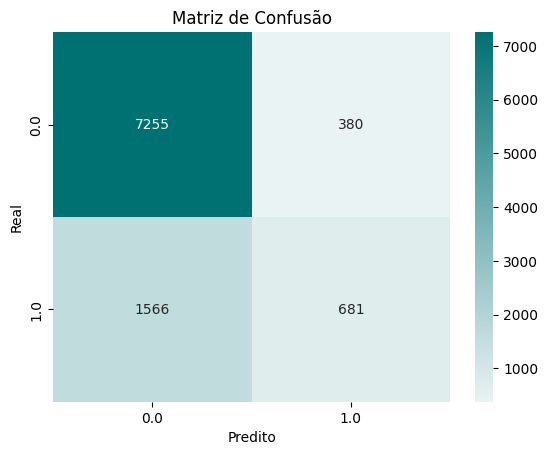

In [ ]:
# Gerando a matriz de confusão
cm = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'])

# Gerando o heatmap
sns.heatmap(cm, annot=True, cmap=paleta_cores, fmt='g')

# Configurando o título do heatmap
plt.title('Matriz de Confusão')

# Exibindo o heatmap
plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Selecionando as variáveis de interesse
X = dados_copy[['Physically_attacked', 'Most_of_the_time_or_always_felt_lonely', 'Other_students_kind_and_helpful', 'Sex', 'Physical_fighting',
                'Missed_classes_or_school_without_permission', 'Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months']]
y = dados_copy['Cyber_bullied_in_past_12_months']

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adicionando constante à matriz X
X_train = sm.add_constant(X_train)

# Criando e treinando o modelo
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Exibindo os resultados
print(result.summary())

# Calculando e exibindo as razões de chances (odds ratios)
odds = np.exp(result.params)
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

Optimization terminated successfully.
         Current function value: 0.441306
         Iterations 6
                                  Logit Regression Results                                 
Dep. Variable:     Cyber_bullied_in_past_12_months   No. Observations:                23056
Model:                                       Logit   Df Residuals:                    23047
Method:                                        MLE   Df Model:                            8
Date:                             Tue, 16 May 2023   Pseudo R-squ.:                  0.1677
Time:                                     02:55:11   Log-Likelihood:                -10175.
converged:                                    True   LL-Null:                       -12225.
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

,coef
Bullied_not_on_school_property_in_past_12_months,3.973912
Bullied_on_school_property_in_past_12_months,2.468397
Sex,2.093875
Most_of_the_time_or_always_felt_lonely,1.583769
Missed_classes_or_school_without_permission,1.321166
Physically_attacked,1.114605
Physical_fighting,1.099826
Other_students_kind_and_helpful,0.949966


## <font color=#007172>**Bullying que ocorre na escola** 

In [ ]:
#Modelo de regressão logistico - Bullied_on_school_property_in_past_12_months

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dados_copy = dados_copy.replace(' ', np.nan)
dados_copy.dropna(inplace=True)

X = dados_copy[['Physically_attacked', 'Most_of_the_time_or_always_felt_lonely', 
                'Cyber_bullied_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 
                'Other_students_kind_and_helpful', 'Parents_understand_problems']]
y = dados_copy['Bullied_on_school_property_in_past_12_months']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc}')

Acurácia: 0.8089455575794373


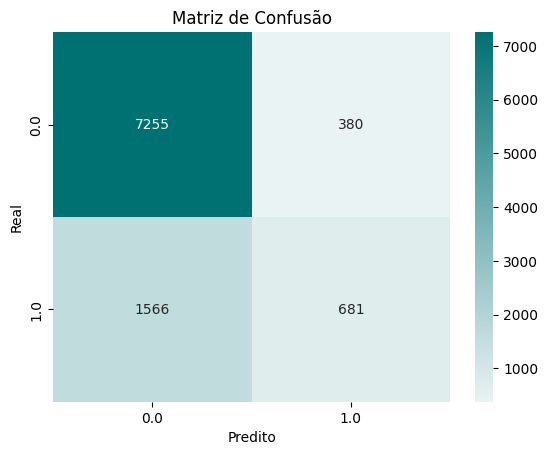

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando a matriz de confusão
cm = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'])

# Gerando o heatmap
sns.heatmap(cm, annot=True, cmap=paleta_cores, fmt='g')

# Configurando o título do heatmap
plt.title('Matriz de Confusão')

# Exibindo o heatmap
plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Selecionando as variáveis de interesse
X = dados_copy[['Physically_attacked', 'Most_of_the_time_or_always_felt_lonely', 
                'Cyber_bullied_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 
                'Other_students_kind_and_helpful', 'Parents_understand_problems']]
y = dados_copy['Bullied_on_school_property_in_past_12_months']

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adicionando constante à matriz X
X_train = sm.add_constant(X_train)

# Criando e treinando o modelo
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Exibindo os resultados
print(result.summary())

# Calculando e exibindo as razões de chances (odds ratios)
odds = np.exp(result.params)
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

Optimization terminated successfully.
         Current function value: 0.428150
         Iterations 6
                                        Logit Regression Results                                        
Dep. Variable:     Bullied_on_school_property_in_past_12_months   No. Observations:                23056
Model:                                                    Logit   Df Residuals:                    23049
Method:                                                     MLE   Df Model:                            6
Date:                                          Tue, 16 May 2023   Pseudo R-squ.:                  0.1631
Time:                                                  03:17:42   Log-Likelihood:                -9871.4
converged:                                                 True   LL-Null:                       -11796.
Covariance Type:                                      nonrobust   LLR p-value:                     0.000
                                                       coe

,coef
Bullied_not_on_school_property_in_past_12_months,4.189268
Cyber_bullied_in_past_12_months,2.484952
Most_of_the_time_or_always_felt_lonely,1.629232
Physically_attacked,1.159276
Parents_understand_problems,1.037238
Other_students_kind_and_helpful,0.803451


## <font color=#007172>**Bullying que não ocorre na escola** 

In [ ]:
#Modelo de regressão logistico - Bullied_not_on_school_property_in_past_12_months---- Teste dos itens 02 e 03 do ultimo email da Ana Carla

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dados_copy = dados_copy.replace(' ', np.nan)
dados_copy.dropna(inplace=True)

X = dados_copy[['Physically_attacked','Most_of_the_time_or_always_felt_lonely','Parents_understand_problems','Physical_fighting', 
                'Miss_school_no_permission', 'Cyber_bullied_in_past_12_months', 'Bullied_on_school_property_in_past_12_months']]
y = dados_copy['Bullied_not_on_school_property_in_past_12_months']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc}')

Acurácia: 0.8197733252378061


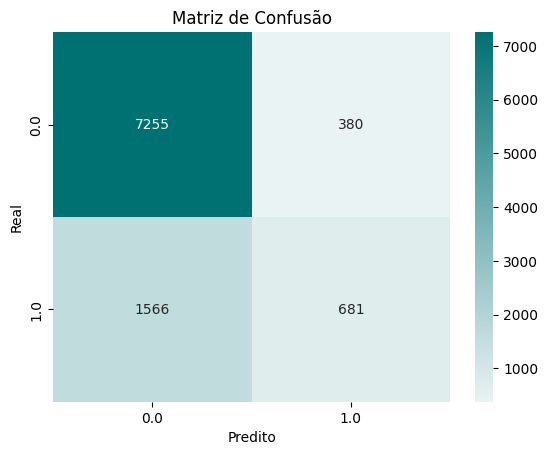

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando a matriz de confusão
cm = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'])

# Gerando o heatmap
sns.heatmap(cm, annot=True, cmap=paleta_cores, fmt='g')

# Configurando o título do heatmap
plt.title('Matriz de Confusão')

# Exibindo o heatmap
plt.show()


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Selecionando as variáveis de interesse
X = dados_copy[['Physically_attacked','Most_of_the_time_or_always_felt_lonely','Parents_understand_problems','Physical_fighting', 
                'Miss_school_no_permission', 'Cyber_bullied_in_past_12_months', 'Bullied_on_school_property_in_past_12_months']]
y = dados_copy['Bullied_not_on_school_property_in_past_12_months']

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adicionando constante à matriz X
X_train = sm.add_constant(X_train)

# Criando e treinando o modelo
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Exibindo os resultados
print(result.summary())

# Calculando e exibindo as razões de chances (odds ratios)
odds = np.exp(result.params)
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


Optimization terminated successfully.
         Current function value: 0.427361
         Iterations 6
                                          Logit Regression Results                                          
Dep. Variable:     Bullied_not_on_school_property_in_past_12_months   No. Observations:                23056
Model:                                                        Logit   Df Residuals:                    23048
Method:                                                         MLE   Df Model:                            7
Date:                                              Tue, 16 May 2023   Pseudo R-squ.:                  0.1916
Time:                                                      03:20:04   Log-Likelihood:                -9853.2
converged:                                                     True   LL-Null:                       -12188.
Covariance Type:                                          nonrobust   LLR p-value:                     0.000
                          

,coef
Bullied_on_school_property_in_past_12_months,4.243647
Cyber_bullied_in_past_12_months,3.968733
Most_of_the_time_or_always_felt_lonely,1.575844
Physically_attacked,1.167871
Physical_fighting,1.089577
Miss_school_no_permission,1.078647
Parents_understand_problems,0.935588


## <font color=#007172>**Conclusões**</font>

1. De modo geral, as variáveis com maior relevância estatística e que ajudam melhor a explicar e a prever a ocorrência de bullying e cyberbullying são: 

  - Bullied_on_school_property_in_past_12_months;
  - Bullied_on_school_property_in_past_12_months;
  - Cyber_bullied_in_past_12_months;
  - Physically_attacked;
  - Physical_fighting;
  - Miss_school_no_permission;
  - Most_of_the_time_or_always_felt_lonely;
  - Parents_understand_problems;
  - Other_students_kind_and_helpful;

2. A acurácia dos 3 modelos ficou acima de 80%, o que significa que os modelos realizaram corretamente cerca de 80% das previsões. Esse valor demonstra que os modelos apresentam uma performance muito boa;

3. A partir da análise dos coeficientes (Odds Ratio ou Razão de Chances) pode-se destacar alguns pontos:

* Coeficientes com valor acima de 1 indicam que existe uma relação positiva. Coeficientes com valor abaixo de 1 indicam correlação negativa, ou seja, conforme o valor ou frequência dessas variáveis aumenta, a ocorrência de bullying diminui, como no caso das variáveis Parentes_understand_problems e Other_students_kind_and_helpful;

* Uma criança ou adolescente que sofre um dos tipos de bullying apresentados na análise, possui grandes chances de ser vítima dos outros tipos também (são as variáveis que apresentam os maiores coeficientes presentes nos modelos);

* Importante se atentar para a saúde mental de crianças e adolescentes e observar com atenção seus hábitos e atitudes dentro e fora do ambiente escolar, como envolvimento em brigas, ausências nas aulas, e afastamento de amigos e familiares;

* O ambiente familiar e o relacionamento com os pais também se mostrou como um ponto de atenção. Manter uma relação aberta e de confiança, onde a família é vista como um ponto de segurança pode ser determinante para pessoas vítimas de bullying, além de ser um facilitador na identificação de possíveis situações, denúncias e mitigação dos impactos;

* Conforme analisado, a prática de cyberbullying ocorre com maior frequência com meninas adolescentes. O modelo desenvolvido confirma que mudanças na variável gênero podem aumentar as chances da pessoa ser vítima de bullying, e isso deve ser levado em consideração na proposição de estratégias de enfrentamento. 


# <font color=#025259>**Sugestões de combate ao bullying** </font>

## <font color=#007172>**Programa  de combate ao bullying**

#### <font color=#007172>**Público - Alvo**</font> 
Crianças e adolescentes, diretores, professores e demais funcionários das escolas, e famílias (é importante envolver não apenas o agressor e a vítima, mas também quem assiste e presencia a prática de bullying)

#### <font color=#007172>**Escala de abrangência do programa**</font> 
Estadual (articulação entre rede municipal e estadual de educação)

#### <font color=#007172>**Objetivo**</font> 
Conscientizar e combater a prática de bullying e cyberbullying através da atuação escola-família

#### <font color=#007172>**Ações**</font> 

* Implementação/manutenção de programas de acompanhamento psicológico dos alunos dentro das escolas;
* Treinamento para professores e funcionários, com capacitação para identificação e atuação frente a possíveis cenários de prática de bullying, considerando diferenças nas características de motivações por gênero;
* Realização de campanhas presenciais e online, de sensibilização e combate ao bullying, com envolvimento dos alunos na elaboração dos materiais, por exemplo;
* Rodas de conversa mensais com pais e familiares sobre bullying e impactos na saúde de crianças e adolescentes, com foco na importância da família como agente aliado ao combate e mitigação de danos;
* Atividades interdisciplinares quinzenais ou mensais, levando em consideração a faixa etária dos estudantes, com temáticas sobre autoconhecimento, auto aceitação, diversidade, inclusão, empatia, igualdade de gênero, entre outros;
* Realização de atividades que estimulem o trabalho em grupo e a cooperação, com objetivo de criação de vínculos entre alunos;
* Estruturação de procedimento para acolhimento de vítimas e familiares, como criação de grupos de apoio para alunos alvo e atendimento psicológico;

#### <font color=#007172>**Avaliação de resultados**</font> 

Realização de entrevistas e aplicação de nova pesquisa para verificar a incidência da prática de bullying. Comparação com períodos anteriores, e definição de novas estratégias pautadas nos resultados.

#### <font color=#007172>**Sugestões futuras**</font> 

Realizar pesquisa com foco nos agressores: conhecer motivações, histórico acadêmico, relações familiares entre outros, como o objetivo de definir melhor as ações de enfrentamento ao problema.


---

## <font color=#007172>**Outras sugestões**

#### <font color=#007172>**1.**</font> Promover ações de conscientização sobre o bullying
#### <font color=#007172>**2.**</font> Fortalecer a rede de apoio emocional
#### <font color=#007172>**3.**</font> Incentivar a prática de atividades físicas
#### <font color=#007172>**4.**</font> Reforçar a supervisão escolar
#### <font color=#007172>**5.**</font> Desenvolver programas de apoio para alunos com problemas de saúde mental
#### <font color=#007172>**6.**</font> Criar um ambiente escolar seguro e inclusivo
